# Latar Belakang
Komisi Taksi dan Limusin Kota New York (TLC), yang dibentuk pada tahun 1971, adalah badan yang bertanggung jawab atas perizinan dan pengaturan taksi Medallion (Kuning) Kota New York, kendaraan sewaan (warna berbasis komunitas, mobil hitam, dan limusin mewah) , van komuter, dan kendaraan paratransit. Dewan Komisi terdiri dari sembilan anggota, delapan di antaranya merupakan Komisaris tidak digaji. Ketua/Komisaris yang digaji memimpin rapat komisi publik yang dijadwalkan secara rutin dan merupakan kepala lembaga, yang memiliki staf sekitar 600 karyawan TLC.

Lebih dari 200.000 pemegang lisensi TLC menyelesaikan sekitar 1.000.000 perjalanan setiap hari. Untuk dapat menyewa, pengemudi harus terlebih dahulu menjalani pemeriksaan latar belakang, memiliki catatan mengemudi yang aman, dan menyelesaikan pelatihan pengemudi 24 jam. Kendaraan berlisensi TLC diperiksa keselamatan dan emisinya di Fasilitas Inspeksi Woodside TLC.


Sumber dapat diakses pada link berikut [klik link](https://www.nyc.gov/site/tlc/about/about-tlc.page). 

## **Pernyataan Masalah**

Terdapat 2 VendorID penyedia layanan, yaitu
<br>

**`1. Teknologi Seluler Kreatif, LLC.`**

**`2. VeriFone Inc.`**

Pada uraian dibawah akan dibandingkan performa dari 2 penyedia layanan tersebut, agar mengetahui seberapa baik dan buruk pelayanan mereka, agar nantinya bisa dilakukan evaluasi untuk menjadi lebih baik kedepannya. Variabel yang akan dipakai untuk perbandingannya yaitu berdasarkan :

    a. Trip_distance

    b. Passenger_count
    
    c. Total_amount

# Data
Untuk menganalisa pertanyaan yang ada diatas, membutuhkan library yang akan dipakai untuk analisis dataset New York City Taxy (NYC) Limousine Commission (TLC) Trip Record.

In [1]:
# Import library
import pandas as pd
import numpy as np

# Import untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import warnings
warnings.filterwarnings("ignore")

Data set ini berisi informasi mengenai argo taksi di New York City. Mulai dari argo awal perjalanan, argo setelah pemberhentian, jarak perjalanan, total bayar, dan kolom - kolom lainnya. Berikut uraian lengkap mengenai kolom yang ada pada dataset tersebut :

* VendorID --> Kode yang menunjukkan penyedia LPEP yang menyediakan rekaman.

	1 = Teknologi Seluler Kreatif, LLC.

	2 = VeriFone Inc
* lpep_pickup_datetime --> Tanggal dan waktu saat meteran diaktifkan.
* lpep_dropoff_datetime --> tanggal dan waktu meteran itu berada terlepas.
* Passenger_count --> jumlah penumpang di dalam kendaraan. Ini adalah nilai yang dimasukkan oleh driver.
* Trip_distance --> Jarak perjalanan yang telah berlalu dalam mil dilaporkan oleh argometer.
* PULocationID --> Zona Taksi TLC di mana Argometer digunakan
* DOLocationID --> Zona Taksi TLC di mana Argometer dimatikan.
* RateCodeID --> Kode tarif akhir berlaku di akhir perjalanan.

	1 = Tarif standar

	2 = JFK

	3 = Taman Baru
	
	4 = Nassau atau Westchester

	5 = Tarif yang dinegosiasikan

	6 = Perjalanan berkelompok

* Store_and_fwd_flag --> Bendera ini menunjukkan apakah rekor perjalanan telah dipegang
dalam memori kendaraan sebelum dikirim ke vendor, alias "simpan dan maju", karena kendaraan melakukannya
tidak memiliki koneksi ke server.

	Y = menyimpan dan meneruskan perjalanan

	N = bukan perjalanan simpan dan maju
	
* Payment_type --> Kode numerik yang menandakan cara penumpang membayar untuk perjalanan.

	1 = Kartu kredit

	2 = Uang tunai

	3 = Tanpa biaya

	4 = Sengketa

	5 = Tidak diketahui

	6 = Perjalanan dibatalkan

* Fare_amount --> Tarif waktu dan jarak dihitung oleh meter. Ekstra Lain-lain Ekstra dan biaya tambahan.
Saat ini, ini hanya mencakup $0,50 dan $1 biaya jam dan semalam.
* MTA_tax --> Pajak MTA $0,50 yang dipicu secara otomatis berdasarkan pada tarif meteran yang digunakan.
* Improvement_surcharge --> Biaya tambahan perbaikan sebesar $0,30 dinilai saat dipuji
perjalanan di bendera menjatuhkan. Biaya tambahan perbaikan mulai diterapkan dipungut pada tahun 2015.
* Tip_amount --> Bidang ini secara otomatis diisi untuk kartu kredit tip. Tip tunai tidak termasuk.
* Tolls_amount --> Jumlah total semua tol yang dibayarkan dalam perjalanan.
* Total_amount --> Jumlah total yang dibebankan kepada penumpang. Tidak termasuk tip uang tunai
* Trip_type --> Kode yang menunjukkan apakah perjalanan tersebut merupakan hujan es di jalan raya
atau pengiriman yang ditetapkan secara otomatis berdasarkan pada tarif meteran yang digunakan tetapi dapat diubah oleh
pengemudi.

	1 = Melambaikan tangan
	
	2 = Pesan secara online

## **Load Dataset**

Load dataset untuk mengetahui informasi mengenai kolom apa saja yang tersedia, dan juga informasi lainnya.

In [2]:
df = pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## **Data Understanding and Cleaning**
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi apa - apa saja yang ada pada dataset New York City TLC Trip Record:

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [4]:
# Menampilkan deskripsi dari tiap kolom yang ada (Kolom Kategorikal dan Kolom Numerikal)
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [5]:
# Menampilkan nilai unik pada setiap kolom yang ada :
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

## **Missing Value**

In [6]:
# Menunjukan ada berapa total missing values pada dataset tersebut :
df.isna().sum()

VendorID                 0    
lpep_pickup_datetime     0    
lpep_dropoff_datetime    0    
store_and_fwd_flag       4324 
RatecodeID               4324 
PULocationID             0    
DOLocationID             0    
passenger_count          4324 
trip_distance            0    
fare_amount              0    
extra                    0    
mta_tax                  0    
tip_amount               0    
tolls_amount             0    
ehail_fee                68211
improvement_surcharge    0    
total_amount             0    
payment_type             4324 
trip_type                4334 
congestion_surcharge     4324 
dtype: int64

In [7]:
# Menunjukan presentase, seberapa banyak missing values pada dataset tersebut :
df.isna().sum()/df.shape[0]*100

VendorID                 0.000000  
lpep_pickup_datetime     0.000000  
lpep_dropoff_datetime    0.000000  
store_and_fwd_flag       6.339154  
RatecodeID               6.339154  
PULocationID             0.000000  
DOLocationID             0.000000  
passenger_count          6.339154  
trip_distance            0.000000  
fare_amount              0.000000  
extra                    0.000000  
mta_tax                  0.000000  
tip_amount               0.000000  
tolls_amount             0.000000  
ehail_fee                100.000000
improvement_surcharge    0.000000  
total_amount             0.000000  
payment_type             6.339154  
trip_type                6.353814  
congestion_surcharge     6.339154  
dtype: float64

## **Mengecek Data Duplikat**

In [8]:
# Mengecek apakah ada data duplikat pada dataset tersebut :
df.duplicated().sum()

0

**Insight :**

* Terdapat **missing value** pada 7 kolom dari total 20 kolom yang ada.
* Kolom `'ehail_fee'` memiliki presentase **missing value** sebanyak 100%, sebaiknya dilakukan tindakan dengan menghapus 1 kolom tersebut seluruhnya karena tidak ada informasi yang bisa diambil dari kolom tersebut.
* Ada 6 kolom lainnya yang memiliki **missing value** dengan presentase sebanyak 6.4% dan 6.5% yaitu sebanyak 4324 dan 4334 data **missing value** dari total 68211 data yang ada. Kolom **missing value** tersebut yaitu kolom `'store_and_fwd_flag'`,  `'RatecodeID'`,  `'passenger_count'`,  `'payment_type'`,  `'trip_type'`, dan  `'trip_type'`.
* Tidak terdapat data duplikat pada dataset tersebut.


Ada 2 cara untuk menangani *missing value*:
* Pertama, menghapus baris/kolom yang berisi **missing value**. Kolom `'ehail_fee'` memiliki presentase 100% **missing value**, maka sebaiknya kolom ini dihapus.
* Kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*.

Pada penjelasan diatas, sudah dijelaskan sekilas mengenai data yang kita punya, selanjutnya masuk ketahap selanjutnya yaitu **Cleaning Data**

# **1. Cleaning Data**

In [9]:
# kolom yang numerikal yang akan dianalisis
numericals = ['total_amount', 'trip_distance', 'passenger_count']

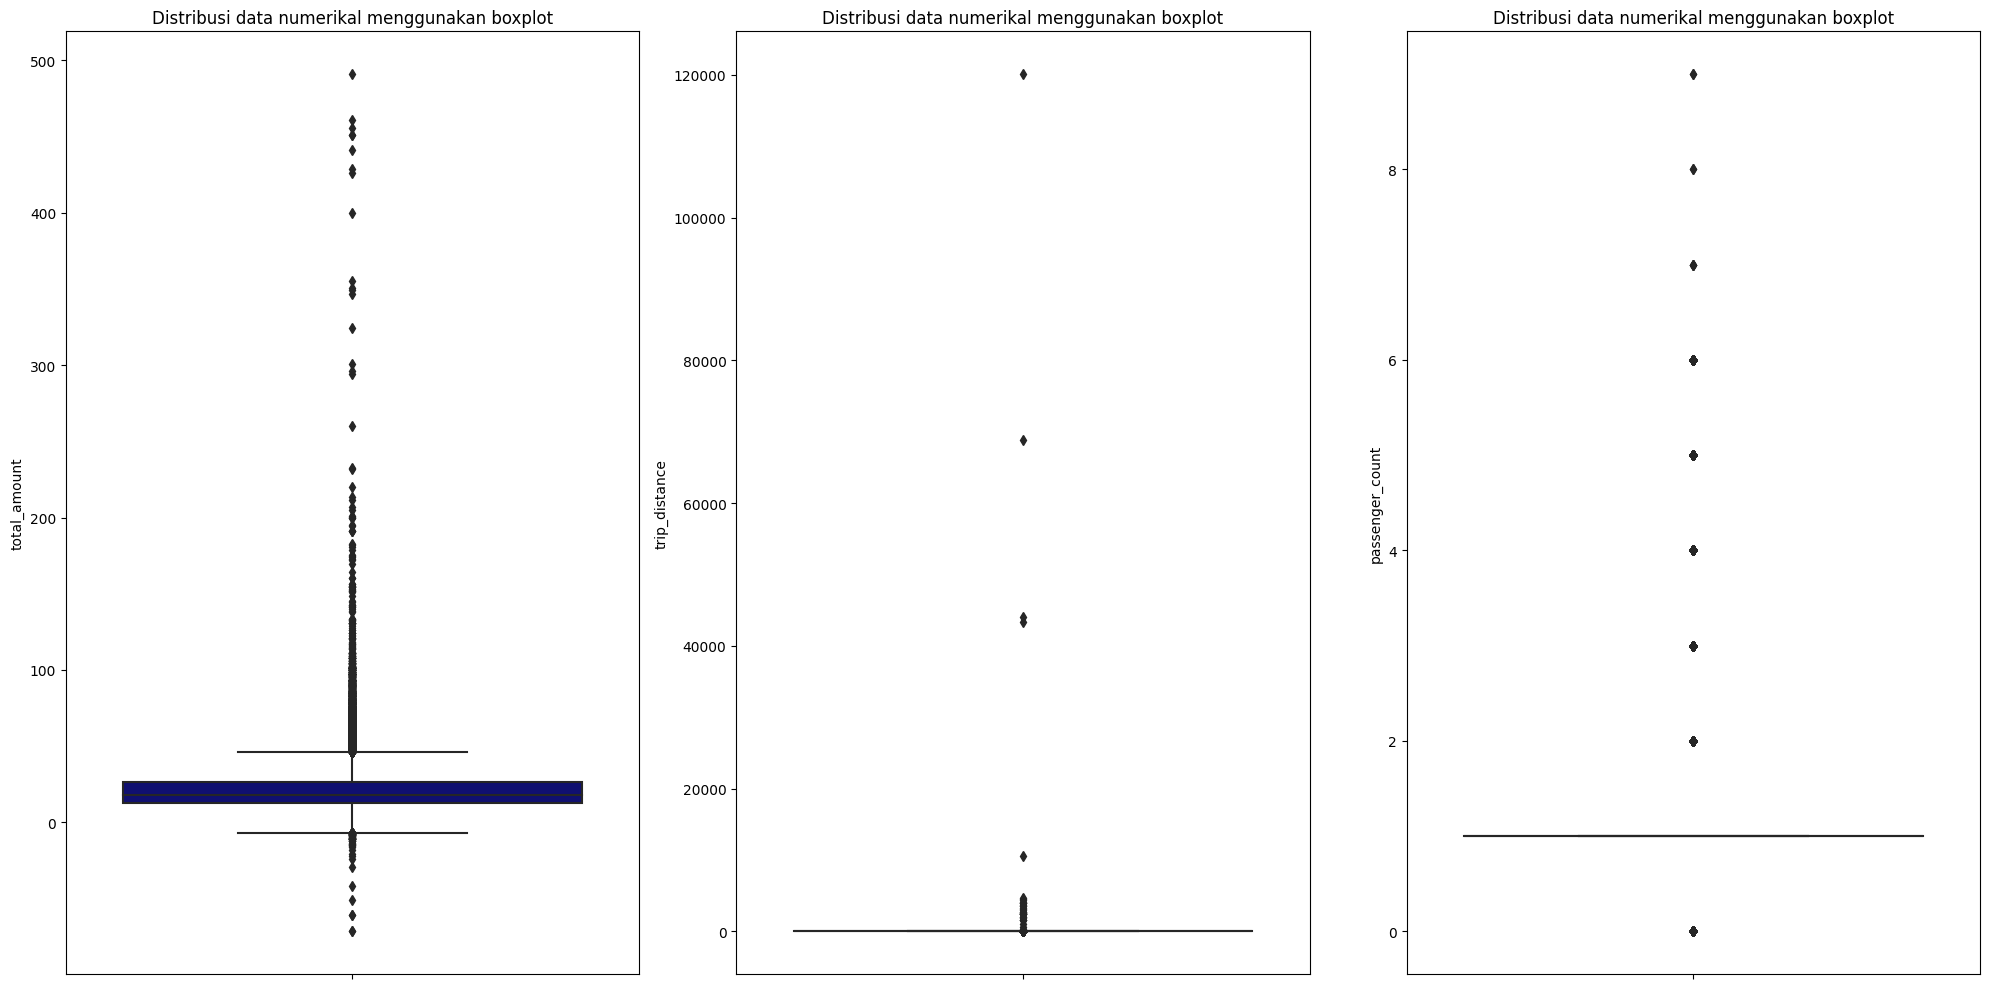

In [10]:
# menampilkan distribusi data menggunakan boxplot
plt.figure(figsize=(20,10))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color = 'navy', orient = 'v')
    plt.tight_layout()
    plt.title('Distribusi data numerikal menggunakan boxplot')

plt.show()

#### **a. Menghapus kolom `'ehail_fee'`**

Kolom `'ehail_fee'` dihapus karena memiliki **missing value** dengan presentase 100% atau tidak ada data terdapat didalamnya.

In [11]:
# drop/hapus pada kolom "ehail_fee" karena missing valuenya mencapai 100%
df = df.drop(columns = ['ehail_fee'])
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


In [12]:
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

#### **b. Menghapus anomali pada kolom 'RatecodeID'**

Terdapat anomali pada kolom 'RatecodeID' yaitu terdapat nilai '99', padahal merujuk pada dictionary kolom 'RatecodeID' hanya terdapat nilai 1 - 6 sebagai berikut :

	1 = Tarif standar
	2 = JFK
	3 = Taman Baru
	4 = Nassau atau Westchester
	5 = Tarif yang dinegosiasikan
	6 = Perjalanan berkelompok

Maka baris yang 'RatecodeID' nya bernilai 99 akan dilakukan tindakan berupa penghapusan.

In [13]:
# menampilkan baris yang 'RatecodeID' nya == 99
df[df['RatecodeID'] == 99]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,NaN,0.0


In [14]:
# menghapus baris yang 'RatecodeID' nya == 99
df = df.drop(df[df.RatecodeID == 99].index)

#### **c. Mengisi missing value pada kolom 'RatecodeID'**

Terdapat missing value pada kolom 'RatecodeID' yang akan diisikan dengan median pada kolom tersebut.

In [15]:
# Terdapat nilai unik 'nan' atau missing value pada kolom 'RatecodeID'
df['RatecodeID'].unique()

array([ 1.,  5.,  4.,  3.,  2., nan])

In [16]:
# Dicari nilai median dari kolom 'RatecodeID' tersebut --> 1
df['RatecodeID'].median()

1.0

In [17]:
# Dicari nilai modus dari kolom 'RatecodeID' tersebut --> 1
df['RatecodeID'].mode()

0    1.0
Name: RatecodeID, dtype: float64

In [18]:
# Dicari nilai median dari kolom 'RatecodeID' tersebut --> 1
ratecodeID_median = df['RatecodeID'].median()
ratecodeID_median

1.0

In [19]:
# Kolom 'RatecodeID' akan diisikan dengan nilai 1 berdasarkan median yang didapat
df['RatecodeID'].fillna(ratecodeID_median, inplace=True)

In [20]:
# Pada kolom 'RatecodeID' sudah tidak terdapat missing value
df['RatecodeID'].unique()

array([1., 5., 4., 3., 2.])

In [21]:
# kolom 'RatecodeID' sudah tidak memiliki missing value
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       4324
RatecodeID               0   
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             4324
trip_type                4324
congestion_surcharge     4324
dtype: int64

#### **d. Mengisi missing value pada kolom 'trip_type'**

Terdapat missing value pada kolom 'trip_type' yang akan diisikan dengan median pada kolom tersebut. Terdapat 2 kode pada kolom 'type_type' yaitu :
    
     1 : Melambaikan tangan
     2 : Pesan secara online

In [22]:
# Terdapat nilai unik 'nan' atau missing value pada kolom 'trip_distance'
df['trip_type'].unique()

array([ 1.,  2., nan])

In [23]:
# Nilai median pada kolom 'trip_type' --> 1
df['trip_type'].median()

1.0

In [24]:
# Nilai modus pada kolom 'trip_type' --> 1
df['trip_type'].mode()

0    1.0
Name: trip_type, dtype: float64

In [25]:
# Dicari nilai median dari kolom 'trip_type' tersebut --> 1
triptype_median = df['trip_type'].median()
triptype_median

1.0

In [26]:
# Kolom 'trip_type akan diisikan dengan nilai 1 berdasarkan median yang didapat
df['trip_type'].fillna(triptype_median, inplace=True)

In [27]:
# Pada kolom 'RatecodeID' sudah tidak terdapat missing value
df['trip_type'].unique()

array([1., 2.])

In [28]:
# kolom 'tyip_type' sudah tidak memiliki missing value
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       4324
RatecodeID               0   
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             4324
trip_type                0   
congestion_surcharge     4324
dtype: int64

#### **e. Mengisi missing value pada kolom 'Payment_type'**

Pada kolom 'payment_type', terdapat 6 pilihan yaitu :

	1 = Kartu kredit
	2 = Uang tunai
	3 = Tanpa biaya
	4 = Sengketa
	5 = Tidak diketahui
	6 = Perjalanan dibatalkan

Missing value akan diisikan dengan nilai '5' yaitu 'Payment_type' nya 'Tidak Diketahui'

In [29]:
df['payment_type'].unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

Terdapat **missing value** pada kolom `'payment_type'`, maka akan diisikan dengan nilai 5 --> yaitu 'payment_type' nya (Tidak diketahui)

In [30]:
# Akan dilakukan tindakan dengan mengisikan nilai missing value dengan value 5
# Karena 'payment_type' nya tidak diketahui

fill_payment_type = df['payment_type'].fillna(5.0, inplace=True)

In [31]:
# kolom 'payment_type' sudah tidak memiliki missing value
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       4324
RatecodeID               0   
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             0   
trip_type                0   
congestion_surcharge     4324
dtype: int64

#### **f. Mengisi missing value pada kolom 'store_and_fwd_flag'**

Dari kolom `'store_and_fwd_flag'` memiliki 2 value yaitu :

    Y = menyimpan dan meneruskan perjalanan
	N = bukan perjalanan simpan dan maju

Akan diambil nilai yang paling banyak muncul atau modus --> mode untuk mengisi **missing value**

In [32]:
# Akan dicari mode() dari kolom 'store_and_fwd_flag'
store_and_fwd_flag_mode = df[['store_and_fwd_flag']].mode()
store_and_fwd_flag_mode

,store_and_fwd_flag
0,N


In [33]:
# Buat fungsi lambda untuk konversi
convert_flag = lambda x: 1 if x == 'Y' else 0

# Terapkan fungsi lambda pada kolom 'store_and_fwd_flag'
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].apply(convert_flag)

# Ubah tipe data kolom menjadi float
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype(float)

# Tampilkan DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 68201 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68201 non-null  int64  
 1   lpep_pickup_datetime   68201 non-null  object 
 2   lpep_dropoff_datetime  68201 non-null  object 
 3   store_and_fwd_flag     68201 non-null  float64
 4   RatecodeID             68201 non-null  float64
 5   PULocationID           68201 non-null  int64  
 6   DOLocationID           68201 non-null  int64  
 7   passenger_count        63877 non-null  float64
 8   trip_distance          68201 non-null  float64
 9   fare_amount            68201 non-null  float64
 10  extra                  68201 non-null  float64
 11  mta_tax                68201 non-null  float64
 12  tip_amount             68201 non-null  float64
 13  tolls_amount           68201 non-null  float64
 14  improvement_surcharge  68201 non-null  float64
 15  total_a

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68201 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68201 non-null  int64  
 1   lpep_pickup_datetime   68201 non-null  object 
 2   lpep_dropoff_datetime  68201 non-null  object 
 3   store_and_fwd_flag     68201 non-null  float64
 4   RatecodeID             68201 non-null  float64
 5   PULocationID           68201 non-null  int64  
 6   DOLocationID           68201 non-null  int64  
 7   passenger_count        63877 non-null  float64
 8   trip_distance          68201 non-null  float64
 9   fare_amount            68201 non-null  float64
 10  extra                  68201 non-null  float64
 11  mta_tax                68201 non-null  float64
 12  tip_amount             68201 non-null  float64
 13  tolls_amount           68201 non-null  float64
 14  improvement_surcharge  68201 non-null  float64
 15  total_a

In [35]:
# Value yang awalnya 'Y' dan'N' telah berubah menjadi typedata float
# Karena jika masih berupa string, tidak bisa diambil mode() nya
store_and_fwd_flag_mode = df[['store_and_fwd_flag']].mode()
store_and_fwd_flag_mode

,store_and_fwd_flag
0,0.0


In [36]:
# Karena mode() dari kolom 'store_and_fwd_flag' sudah diketahui
# Akan dilakukan fungsi fillna() untuk mengisi missing value
df[['store_and_fwd_flag']].fillna(store_and_fwd_flag_mode, inplace=True)


In [37]:
# kolom 'store_and_fwd_flag' sudah tidak memiliki missing value
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       0   
RatecodeID               0   
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             0   
trip_type                0   
congestion_surcharge     4324
dtype: int64

#### **g. Mengisi missing value pada kolom 'passenger_count'**

Terdapat **missing value** pada kolom `'passenger_count'`, maka akan diisikan value nya dengan nilai median nya. Karena tidak mungkin penumpangnya <= 0.

In [38]:
# terdapat missing value pada kolom 'passenger_count' --> nan,
# akan diisikan dengan nilai mediannya
df['passenger_count'].unique()

array([ 1.,  2.,  4.,  3.,  6.,  5.,  0.,  7.,  9.,  8., nan])

In [39]:
# Untuk mengetahui nilai mediannya
passengercount_median = df['passenger_count'].median()
passengercount_median

1.0

In [40]:
# Dilakukan fillna() untuk mengisikan missing valuenya dengan nilai median
df['passenger_count'].fillna(passengercount_median, inplace=True)

In [41]:
# kolom 'passenger_count' sudah tidak memiliki missing value
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       0   
RatecodeID               0   
PULocationID             0   
DOLocationID             0   
passenger_count          0   
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             0   
trip_type                0   
congestion_surcharge     4324
dtype: int64

#### **h. Mengisi missing value pada kolom 'congestion_surcharge'**

Kolom `'congestion_surcharge'` akan diisikan dengan nilai median dari kolom tersebut

In [42]:
# mencari nilai median dari kolom 'congestion_surcharge'
df['congestion_surcharge'].median()

0.0

In [43]:
# dibuat variable untuk mewakili median dari kolom 'congestion_surcharge'
congestion_surcharge_median = df['congestion_surcharge'].median()

In [44]:
# Mengisikan median yaitu 0, pada kolom 'congestion_surcharge'
df['congestion_surcharge'].fillna(congestion_surcharge_median, inplace=True)

In [45]:
# kolom 'congestion_surcharge' sudah tidak memiliki missing value
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [46]:
# menampilkan dataframe
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,0.0,1.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,5.0,1.0,0.00
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,5.0,1.0,0.00
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,5.0,1.0,0.00
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,5.0,1.0,0.00


Sudah tidak terdapat **missing value** pada dataset, selanjutnya akan dicek anomali yang ada pada dataset

<Axes: >

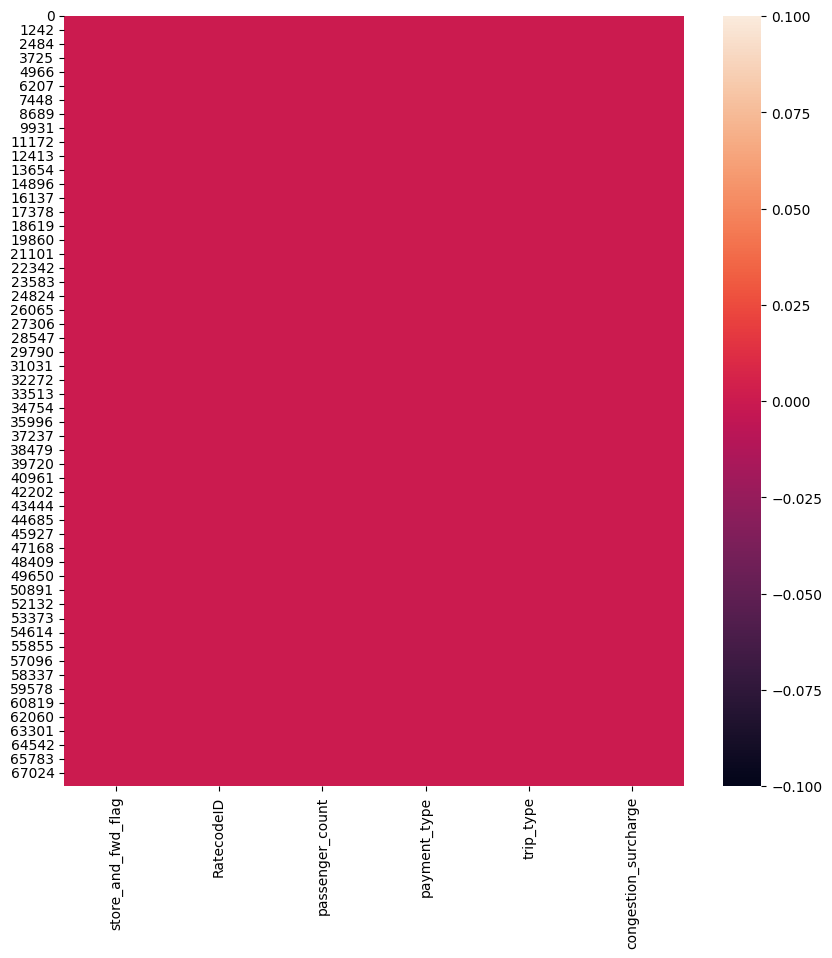

In [47]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['store_and_fwd_flag','RatecodeID','passenger_count','payment_type','trip_type','congestion_surcharge']].isna())

## **Mengecek Anomali pada dataset**

Ditemukan anomali pada kolom `'total_amount'` < 0 yaitu nilainya negatif, tidak mungkin 'total_amount' bernilai negatif. Maka baris yang 'total_amount'nya negatif akan dilakukan tindakan berupa penghapusan baris tersebut.

In [48]:
# jumlah data yang 'total_amount' nya kurang dari $1
df[df['total_amount'] < 1 ].count()

VendorID                 249
lpep_pickup_datetime     249
lpep_dropoff_datetime    249
store_and_fwd_flag       249
RatecodeID               249
PULocationID             249
DOLocationID             249
passenger_count          249
trip_distance            249
fare_amount              249
extra                    249
mta_tax                  249
tip_amount               249
tolls_amount             249
improvement_surcharge    249
total_amount             249
payment_type             249
trip_type                249
congestion_surcharge     249
dtype: int64

In [49]:
# data yang 'total_amount' nya < 1 akan dihapus
df.drop(df.index[df['total_amount'] < 1 ], inplace=True)

Ditemukan anomali pada kolom `'trip_distance'` 500 mil, tetapi total_amount nya tidak masuk akal. Maka baris yang 'trip_distance'nya > 500 mil akan dilakukan tindakan berupa penghapusan baris tersebut.

In [50]:
# menampilkan baris yang 'trip_distance' nya > 500
df[df['trip_distance'] > 500]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,0.0,5.0,82,236,1.0,1571.97,29.97,0.0,0.0,3.04,6.55,1.0,43.31,1.0,1.0,2.75
63995,2,2023-01-01 12:35:00,2023-01-01 12:58:00,0.0,1.0,181,137,1.0,579.63,28.49,0.0,0.0,4.84,0.00,1.0,37.08,5.0,1.0,0.00
64446,2,2023-01-05 08:39:00,2023-01-05 08:58:00,0.0,1.0,193,140,1.0,2555.47,23.68,0.0,0.0,0.49,0.00,1.0,27.92,5.0,1.0,0.00
64558,2,2023-01-05 17:21:00,2023-01-05 17:26:00,0.0,1.0,49,65,1.0,3077.89,12.02,0.0,0.0,4.00,0.00,1.0,17.02,5.0,1.0,0.00
64572,2,2023-01-05 18:07:00,2023-01-05 18:13:00,0.0,1.0,193,193,1.0,2606.52,11.00,0.0,0.0,1.20,0.00,1.0,13.20,5.0,1.0,0.00
64609,2,2023-01-06 07:27:00,2023-01-06 07:30:00,0.0,1.0,41,74,1.0,43392.12,12.02,0.0,0.0,2.60,0.00,1.0,15.62,5.0,1.0,0.00
64947,2,2023-01-08 23:47:00,2023-01-08 23:59:00,0.0,1.0,52,79,1.0,2446.53,23.89,0.0,0.0,4.34,0.00,1.0,31.98,5.0,1.0,0.00
64954,2,2023-01-09 04:28:00,2023-01-09 04:46:00,0.0,1.0,119,20,1.0,2027.31,20.64,0.0,0.0,1.00,0.00,1.0,22.64,5.0,1.0,0.00
65149,2,2023-01-10 15:40:00,2023-01-10 16:24:00,0.0,1.0,26,37,1.0,1082.45,49.80,0.0,0.0,0.95,0.00,1.0,51.75,5.0,1.0,0.00
65194,2,2023-01-11 06:02:00,2023-01-11 06:32:00,0.0,1.0,69,90,1.0,120098.84,46.82,0.0,0.0,2.00,0.00,1.0,52.57,5.0,1.0,0.00


In [51]:
# Dilakukan penghapusan terhadap 35 data yang 'trip_distance' > 500
df[df['trip_distance'] > 500].count()

VendorID                 35
lpep_pickup_datetime     35
lpep_dropoff_datetime    35
store_and_fwd_flag       35
RatecodeID               35
PULocationID             35
DOLocationID             35
passenger_count          35
trip_distance            35
fare_amount              35
extra                    35
mta_tax                  35
tip_amount               35
tolls_amount             35
improvement_surcharge    35
total_amount             35
payment_type             35
trip_type                35
congestion_surcharge     35
dtype: int64

In [52]:
# baris yang 'trip_distance' nya > 500 mil akan dihapus
df.drop(df.index[df['trip_distance'] > 500 ], inplace=True)

Diketahui harga taksi di New York City mulai dari $1.9.
Terdapat anomali yaitu 'total_amount' < 1.9, maka akan dilakukan penghapusan pada baris tersebut.
Jika Anda lebih suka taksi, ingatlah bahwa harga taksi di Kota New York tergantung pada beberapa faktor. Harga mulai taksi adalah tentang: 69,000 IDR (4.40 USD). Untuk perjalanan 1 km di Kota New York Anda harus membayar tentang: 29,000 IDR (1.90 USD).
Sumber data dapat diakses [di sini](https://hikersbay.com/prices/usa/newyork?lang=id#num-prices-transportation).

In [53]:
# menampilkan data yang 'total_amount' nya < $4.4
df[df['total_amount'] < 4.4]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
871,2,2023-01-01 17:50:33,2023-01-01 17:52:39,0.0,1.0,210,210,1.0,0.00,3.5,0.0,0.5,0.0,0.0,0.3,4.3,2.0,1.0,0.0
1177,2,2023-01-01 21:26:55,2023-01-01 21:28:23,0.0,1.0,159,159,1.0,0.00,3.0,0.5,0.5,0.0,0.0,0.3,4.3,2.0,1.0,0.0
1299,2,2023-01-02 01:01:55,2023-01-02 01:01:58,0.0,5.0,80,80,1.0,0.00,1.7,0.0,0.0,0.0,0.0,1.0,2.7,2.0,2.0,0.0
1594,1,2023-01-02 11:53:07,2023-01-02 11:53:13,0.0,1.0,152,152,1.0,0.00,2.5,0.0,1.5,0.0,0.0,1.0,4.0,3.0,1.0,0.0
2598,2,2023-01-02 20:51:09,2023-01-02 20:51:24,0.0,1.0,189,189,1.0,0.06,2.5,0.5,0.5,0.0,0.0,0.3,3.8,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59832,1,2023-01-30 07:16:21,2023-01-30 07:16:58,0.0,1.0,77,77,1.0,0.00,2.5,0.0,1.5,0.0,0.0,1.0,4.0,3.0,1.0,0.0
59938,1,2023-01-30 08:02:31,2023-01-30 08:02:41,0.0,1.0,165,165,1.0,0.00,2.5,0.0,1.5,0.0,0.0,1.0,4.0,3.0,1.0,0.0
61608,2,2023-01-30 21:37:11,2023-01-30 21:37:47,0.0,1.0,97,97,1.0,0.00,2.5,0.5,0.5,0.0,0.0,0.3,3.8,2.0,1.0,0.0
62494,2,2023-01-31 12:20:56,2023-01-31 12:22:04,0.0,1.0,43,43,1.0,0.01,3.0,0.0,0.5,0.0,0.0,0.3,3.8,2.0,1.0,0.0


In [54]:
# menampilkan baris yang 'total_amount' nya < $4.4
df[df['total_amount'] < 4.4].count()

VendorID                 96
lpep_pickup_datetime     96
lpep_dropoff_datetime    96
store_and_fwd_flag       96
RatecodeID               96
PULocationID             96
DOLocationID             96
passenger_count          96
trip_distance            96
fare_amount              96
extra                    96
mta_tax                  96
tip_amount               96
tolls_amount             96
improvement_surcharge    96
total_amount             96
payment_type             96
trip_type                96
congestion_surcharge     96
dtype: int64

In [55]:
# menghapus baris yang 'total_amount' nya < $4.4
df.drop(df.index[df['total_amount'] < 4.4], inplace=True)

Akan dicek nilai maksimal pada kolom 'total_amount'

In [56]:
df['total_amount'].max()

491.0

Akan dicek nilai minimal pada kolom 'total_amount'

In [57]:
df['total_amount'].min()

4.5

In [58]:
# Selanjutnya akan dibuat index, untuk reset index pada setiap barisnya
x = df.reset_index()
df =  x.drop(columns='index')

In [59]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


Mengganti type data pada kolom `'lpep_pickup_datetime'` menjadi date time agar mendapat nilai jam, hari, minggunya

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67821 entries, 0 to 67820
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               67821 non-null  int64  
 1   lpep_pickup_datetime   67821 non-null  object 
 2   lpep_dropoff_datetime  67821 non-null  object 
 3   store_and_fwd_flag     67821 non-null  float64
 4   RatecodeID             67821 non-null  float64
 5   PULocationID           67821 non-null  int64  
 6   DOLocationID           67821 non-null  int64  
 7   passenger_count        67821 non-null  float64
 8   trip_distance          67821 non-null  float64
 9   fare_amount            67821 non-null  float64
 10  extra                  67821 non-null  float64
 11  mta_tax                67821 non-null  float64
 12  tip_amount             67821 non-null  float64
 13  tolls_amount           67821 non-null  float64
 14  improvement_surcharge  67821 non-null  float64
 15  to

In [61]:
# mengubah typedata pada kolom 'lpep_pickup_datetime' yang awalnya objek menjadi datetime
df['lpep_pickup_datetime'] = df['lpep_pickup_datetime'].astype('datetime64[ns]')

In [62]:
# mengekstrak hari pada kolom 'lpep_pickup_datetime', lalu membuat kolom baru
# diisikan dengan nama hari dari setiap transaksi
df['day'] = df['lpep_pickup_datetime'].dt.day_name()
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Sunday
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Sunday
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Sunday
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Sunday
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67816,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,0.0,0.0,1.25,0.0,0.3,25.02,5.0,1.0,0.00,Tuesday
67817,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,5.0,1.0,0.00,Tuesday
67818,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,5.0,1.0,0.00,Tuesday
67819,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,5.0,1.0,0.00,Tuesday


In [63]:
# mengekstrak jam pada kolom 'lpep_pickup_datetime', lalu membuat kolom baru
# diisikan dengan jam dari setiap transaksi
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,...,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Sunday,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,...,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Sunday,0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.20,...,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Sunday,0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,...,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Sunday,0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,...,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Sunday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67816,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,...,0.0,1.25,0.0,0.3,25.02,5.0,1.0,0.00,Tuesday,21
67817,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,...,0.0,0.00,0.0,1.0,5.41,5.0,1.0,0.00,Tuesday,22
67818,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,...,0.0,3.51,0.0,1.0,21.04,5.0,1.0,0.00,Tuesday,23
67819,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,...,0.0,3.20,0.0,1.0,19.18,5.0,1.0,0.00,Tuesday,23


Mengganti type data pada kolom `'lpep_dropoff_datetime'` menjadi date time.

In [64]:
# mengubah typedata pada kolom 'lpep_dropoff_datetime' yang awalnya objek menjadi datetime
df['lpep_dropoff_datetime'] = df['lpep_dropoff_datetime'].astype('datetime64[ns]')

In [65]:
# kolom 'lpep_pickup_datetime' dan 'lpep_dropoff_datetime' sudah dirubah datatype nya
# menjadi format datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67821 entries, 0 to 67820
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67821 non-null  int64         
 1   lpep_pickup_datetime   67821 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  67821 non-null  datetime64[ns]
 3   store_and_fwd_flag     67821 non-null  float64       
 4   RatecodeID             67821 non-null  float64       
 5   PULocationID           67821 non-null  int64         
 6   DOLocationID           67821 non-null  int64         
 7   passenger_count        67821 non-null  float64       
 8   trip_distance          67821 non-null  float64       
 9   fare_amount            67821 non-null  float64       
 10  extra                  67821 non-null  float64       
 11  mta_tax                67821 non-null  float64       
 12  tip_amount             67821 non-null  float64       
 13  t

In [66]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Sunday,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Sunday,0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.2,...,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Sunday,0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Sunday,0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Sunday,0


In [67]:
# mengekstrak bulan pada kolom 'lpep_pickup_datetime', lalu membuat kolom baru
# diisikan dengan nama bulan dari setiap transaksi
df['month'] = df['lpep_pickup_datetime'].dt.month
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour,month
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,...,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Sunday,0,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,...,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Sunday,0,1
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.20,...,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Sunday,0,1
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,...,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Sunday,0,1
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,...,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Sunday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67816,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,...,1.25,0.0,0.3,25.02,5.0,1.0,0.00,Tuesday,21,1
67817,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,...,0.00,0.0,1.0,5.41,5.0,1.0,0.00,Tuesday,22,1
67818,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,...,3.51,0.0,1.0,21.04,5.0,1.0,0.00,Tuesday,23,1
67819,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,...,3.20,0.0,1.0,19.18,5.0,1.0,0.00,Tuesday,23,1


Data yang akan dianalisis adalah data pada bulan 01 Januari 2023 - 31 Januari 2023, maka data yang diluar rentang tersebut akan dihapus

In [68]:
# ada 3 baris data yang 'month' nya diluar rentang data yang akan dianalisis
df[df['month'] != 1]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour,month
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,0.0,1.0,7,56,1.0,5.37,16.0,...,0.00,0.00,0.3,16.80,2.0,1.0,0.00,Friday,14,12
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,0.0,1.0,260,164,1.0,5.48,25.5,...,0.00,6.55,0.3,35.60,2.0,1.0,2.75,Friday,14,12
24946,2,2023-02-01 03:10:05,2023-02-01 03:40:35,0.0,5.0,82,198,2.0,4.58,28.0,...,5.66,0.00,0.3,33.96,1.0,2.0,0.00,Wednesday,3,2


In [69]:
# data diluar rentang analisis, akan dilakukan tindakan berupa penghapusan data tersebut
df = df.drop(df[df['month'] != 1].index)

Memisahkan antara VendorID dengan kode 1 yaitu `Teknologi Seluler Kreatif, LLC`, dengan VendorID dengan kode 2 yaitu `VeriFone Inc`. Supaya memudahkan dalam pemanggilannya, maka dibuatlah variabel untuk masing - masing VendorID

In [70]:
# Variabel untuk masing - masing VendorID
df_VendorID_1 = df[df['VendorID'] == 1]
df_VendorID_2 = df[df['VendorID'] == 2]

In [71]:
# VendorID dengan kode 1 yaitu Teknologi Seluler Kreatif, LLC
df_VendorID_1

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour,month
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.3,6.5,...,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Sunday,0,1
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.1,6.0,...,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Sunday,0,1
6,1,2023-01-01 00:09:14,2023-01-01 00:26:39,0.0,1.0,181,45,2.0,3.8,19.1,...,4.85,0.0,1.0,29.20,1.0,1.0,2.75,Sunday,0,1
10,1,2023-01-01 00:16:12,2023-01-01 00:41:43,0.0,1.0,255,234,2.0,4.8,26.8,...,0.00,0.0,1.0,32.05,1.0,1.0,2.75,Sunday,0,1
15,1,2023-01-01 00:49:34,2023-01-01 01:08:23,0.0,1.0,195,210,1.0,11.3,32.5,...,0.00,0.0,1.0,34.50,2.0,1.0,0.00,Sunday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67529,1,2023-01-29 17:00:08,2023-01-29 17:14:38,0.0,1.0,74,142,1.0,3.7,17.7,...,3.29,0.0,1.0,25.24,5.0,1.0,0.00,Sunday,17,1
67575,1,2023-01-30 08:37:09,2023-01-30 08:43:47,0.0,1.0,74,41,1.0,1.2,6.5,...,0.80,0.0,1.0,8.80,5.0,1.0,0.00,Monday,8,1
67622,1,2023-01-30 12:58:41,2023-01-30 13:19:30,0.0,1.0,74,237,1.0,3.1,15.5,...,2.96,0.0,1.0,22.71,5.0,1.0,0.00,Monday,12,1
67624,1,2023-01-30 12:57:54,2023-01-30 13:18:42,0.0,1.0,244,236,1.0,7.5,31.7,...,7.19,0.0,1.0,43.14,5.0,1.0,0.00,Monday,12,1


In [72]:
# VendorID dengan kode 2 yaitu VeriFone Inc
df_VendorID_2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour,month
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,...,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Sunday,0,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,...,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Sunday,0,1
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.20,...,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Sunday,0,1
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,0.0,1.0,41,262,1.0,2.78,17.70,...,0.00,0.0,1.0,22.95,2.0,1.0,2.75,Sunday,0,1
7,2,2023-01-01 00:11:58,2023-01-01 00:24:55,0.0,1.0,24,75,1.0,1.88,14.20,...,0.00,0.0,1.0,16.70,2.0,1.0,0.00,Sunday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67816,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,...,1.25,0.0,0.3,25.02,5.0,1.0,0.00,Tuesday,21,1
67817,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,...,0.00,0.0,1.0,5.41,5.0,1.0,0.00,Tuesday,22,1
67818,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,...,3.51,0.0,1.0,21.04,5.0,1.0,0.00,Tuesday,23,1
67819,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,...,3.20,0.0,1.0,19.18,5.0,1.0,0.00,Tuesday,23,1


## **Data sudah bersih**

Selanjutnya akan ditampilkan informasi mengenai dataset yang sudah bersih seperti dibawah :

In [73]:
df.describe().loc['min'].to_frame().T

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,hour,month
min,1.0,2009-01-01 20:21:27,2009-01-02 11:07:31,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.5,1.0,1.0,0.0,0.0,1.0


In [74]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].dtype, df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Data Type', 'Unique Sample'],
                     data=listItem)
pd.set_option('display.max_colwidth', 100)
tabelDesc

,Column Name,Number of Unique,Data Type,Unique Sample
0,VendorID,2,int64,"[2, 1]"
1,lpep_pickup_datetime,66371,datetime64[ns],"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 ..."
2,lpep_dropoff_datetime,66308,datetime64[ns],"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 ..."
3,store_and_fwd_flag,2,float64,"[0.0, 1.0]"
4,RatecodeID,5,float64,"[1.0, 5.0, 4.0, 3.0, 2.0]"
5,PULocationID,226,int64,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 6..."
6,DOLocationID,249,int64,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 24..."
7,passenger_count,10,float64,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0]"
8,trip_distance,1830,float64,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28..."
9,fare_amount,2506,float64,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12..."


In [75]:
lisPvalue = []
lisNormalitas = []
listKolom = ['passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge']

for i in listKolom :
    stat,pvalue=normaltest(df[i])
    if pvalue > 0.05:
        status = 'Terdistribusi normal' #fail to reject Ho
    else: 
        status = 'Tidak terdistribusi normal' # reject Ho
    lisPvalue.append(pvalue)
    lisNormalitas.append(status)

In [76]:
dfNormalitas = pd.DataFrame({
    'Kolom' : listKolom,
    'pvalue' : lisPvalue,
    'Status_Normalitas' : lisNormalitas
})
dfNormalitas

,Kolom,pvalue,Status_Normalitas
0,passenger_count,0.0,Tidak terdistribusi normal
1,trip_distance,0.0,Tidak terdistribusi normal
2,fare_amount,0.0,Tidak terdistribusi normal
3,extra,0.0,Tidak terdistribusi normal
4,mta_tax,0.0,Tidak terdistribusi normal
5,tip_amount,0.0,Tidak terdistribusi normal
6,tolls_amount,0.0,Tidak terdistribusi normal
7,improvement_surcharge,0.0,Tidak terdistribusi normal
8,total_amount,0.0,Tidak terdistribusi normal
9,congestion_surcharge,0.0,Tidak terdistribusi normal


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67818 entries, 0 to 67820
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67818 non-null  int64         
 1   lpep_pickup_datetime   67818 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  67818 non-null  datetime64[ns]
 3   store_and_fwd_flag     67818 non-null  float64       
 4   RatecodeID             67818 non-null  float64       
 5   PULocationID           67818 non-null  int64         
 6   DOLocationID           67818 non-null  int64         
 7   passenger_count        67818 non-null  float64       
 8   trip_distance          67818 non-null  float64       
 9   fare_amount            67818 non-null  float64       
 10  extra                  67818 non-null  float64       
 11  mta_tax                67818 non-null  float64       
 12  tip_amount             67818 non-null  float64       
 13  tolls_

Total data dari dataset NYC TLC Trip Record awalnya adalah sebanyak 68.211, setelah dilakukan cleaning data, maka total data akhir adalah 67.904. Sebanyak 307 data telah dilakukan tindakan dengan menghapusnya, berdasarkan domain knowledge.

In [78]:
# Save data clean untuk keperluan Tableu
# df.to_excel("NYC_TLC_Clean.xlsx")

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Selanjutnya akan dilakukan analisis perbandingan performa untuk 2 VendorID, yang nantinya bisa menjadi bahan evaluasi. 

Analisis yang dilakukan yaitu dengan membandingkan performa dari 2 VendorID yang ada, dengan kolom yang akan menjadi acuannya yaitu berdasarkan kolom `trip_distance, passenger_count, dan total_amount`.

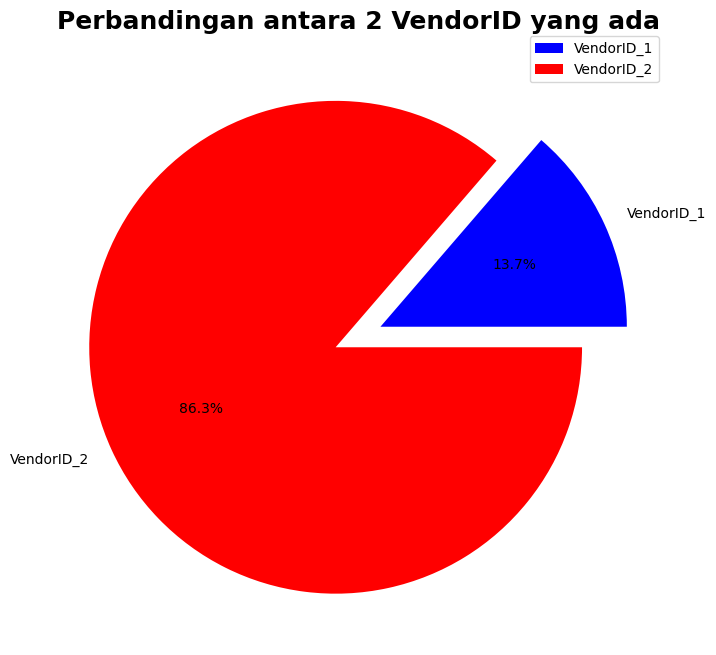

In [119]:
vendor_count_VendorID_1 = df_VendorID_1['VendorID'].value_counts()

vendor_count_VendorID_2 = df_VendorID_2['VendorID'].value_counts()

combined_counts = pd.concat([vendor_count_VendorID_1, vendor_count_VendorID_2])

labels = ['VendorID_1', 'VendorID_2']

plt.figure(figsize=(16, 8))
plt.pie(combined_counts, labels=labels, autopct='%1.1f%%',explode=[0.1,0.1],colors=['blue','red'])


ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Perbandingan antara 2 VendorID yang ada", 
        ha='center', x=xmin+1.25, y=ymax*1.0, 
        fontsize=18, fontweight='bold', 
        color='black')

plt.legend()

plt.show()


Penjelasan mengenai piechart diatas :

1. VendorID : 1 (Teknologi Seluler Kreatif, LLC) memiliki presentase sebanyak 13.7% atau sebanyak 9302 data, dan VendorID : 2 (VeriFone Inc) memiliki presentase jauh lebih banyak yaitu 86.3% atau sebanyak 58602 data. Yang jika dijumlahkan akan menjadi 67904 (total data keseluruhan)
2. Pada masing - masing VendorID terdapat 22 kolom

## Vendor : 1 (Teknologi Seluler Kreatif, LLC)

### -->1. Akan ditampilkan jumlah total penumpang (passenger_count) dari VendorID 1, yang akan digrup berdasarkan hari nya, serta diurutkan dari jumlah passenger_count terbanyak periode Bulan Januari 2023

In [80]:
# menampilkan total dari passenger_count yang digrup berdasarkan hari
df_VendorID_1[["passenger_count", "day"]].groupby("day").sum().sort_values("passenger_count", ascending = False).reset_index()

,day,passenger_count
0,Tuesday,1746.0
1,Monday,1648.0
2,Thursday,1587.0
3,Wednesday,1483.0
4,Friday,1459.0
5,Sunday,1217.0
6,Saturday,1191.0


In [81]:
# dibuat variabel supaya memudahkan dalam pemanggilannya
passenger_count_VendorID_1_by_day = df_VendorID_1[["passenger_count", "day"]].groupby("day").sum().sort_values("passenger_count", ascending = False).reset_index()
passenger_count_VendorID_1_by_day

,day,passenger_count
0,Tuesday,1746.0
1,Monday,1648.0
2,Thursday,1587.0
3,Wednesday,1483.0
4,Friday,1459.0
5,Sunday,1217.0
6,Saturday,1191.0


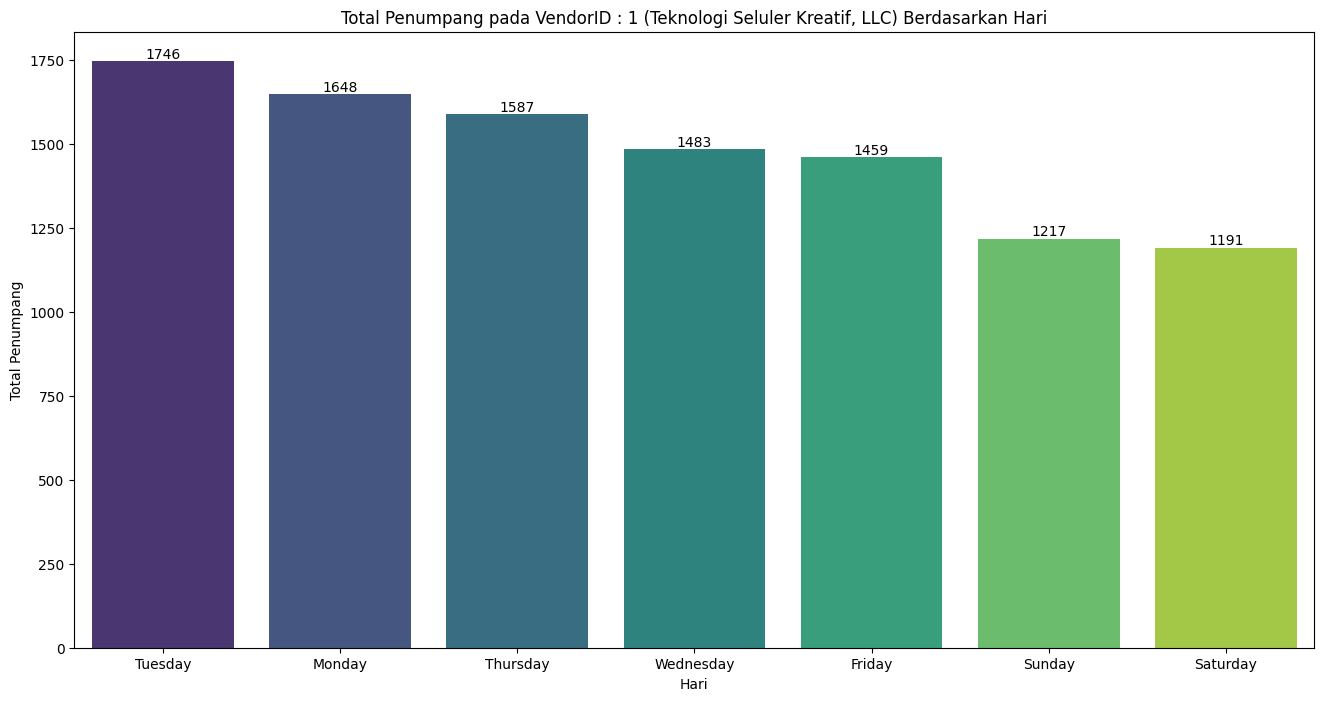

In [82]:
passenger_count_VendorID_1_by_day = df_VendorID_1[["passenger_count", "day"]].groupby("day").sum().sort_values("passenger_count", ascending = False).reset_index()
passenger_count_VendorID_1_by_day

plt.figure(figsize= (16, 8))

label = sns.barplot(data = passenger_count_VendorID_1_by_day, y = 'passenger_count', x = 'day', palette = 'viridis')
for i in label.containers:
    label.bar_label(i,)

plt.ylabel('Total Penumpang')
plt.xlabel('Hari')

plt.title('Total Penumpang pada VendorID : 1 (Teknologi Seluler Kreatif, LLC) Berdasarkan Hari')

plt.show()

**Insight**

1. Analisis Data
    * Informasi diatas adalah yang tertera pada VendorId : 1 (Teknologi Seluler Kreatif, LLC)
    * Didapat hasil bahwa Tuesday adalah hari dengan jumlah penumpang paling banyak, yaitu sebanyak 1750 penumpang (Tertinggi di VendorID 1)
    * Sedangkan Saturday adalah hari dengan jumlah penumpang paling sedikit, yaitu sebanyak 1195 penumpang (Terendah di VendorID 1)

### -->2. Akan ditampilkan jumlah total penumpang (passenger_count) dari VendorID 1 yang akan digrup berdasarkan jamnya, untuk mengetahui jam paling profit pada VendorID 1 ada pada pukul berapa periode Bulan Januari 2023

In [83]:
# menampilkan total dari passenger_count yang digrup berdasarkan hari
df_VendorID_1[["passenger_count", "hour"]].groupby("hour").sum().sort_values("passenger_count", ascending = False).reset_index()

,hour,passenger_count
0,15,865.0
1,16,788.0
2,17,769.0
3,14,766.0
4,13,747.0
5,12,736.0
6,18,713.0
7,11,596.0
8,10,591.0
9,19,569.0


In [84]:
# dibuat variabel supaya memudahkan dalam pemanggilannya
passenger_count_VendorID_1_by_hour = df_VendorID_1[["passenger_count", "hour"]].groupby("hour").sum().sort_values("passenger_count", ascending = False).reset_index()
passenger_count_VendorID_1_by_hour

,hour,passenger_count
0,15,865.0
1,16,788.0
2,17,769.0
3,14,766.0
4,13,747.0
5,12,736.0
6,18,713.0
7,11,596.0
8,10,591.0
9,19,569.0


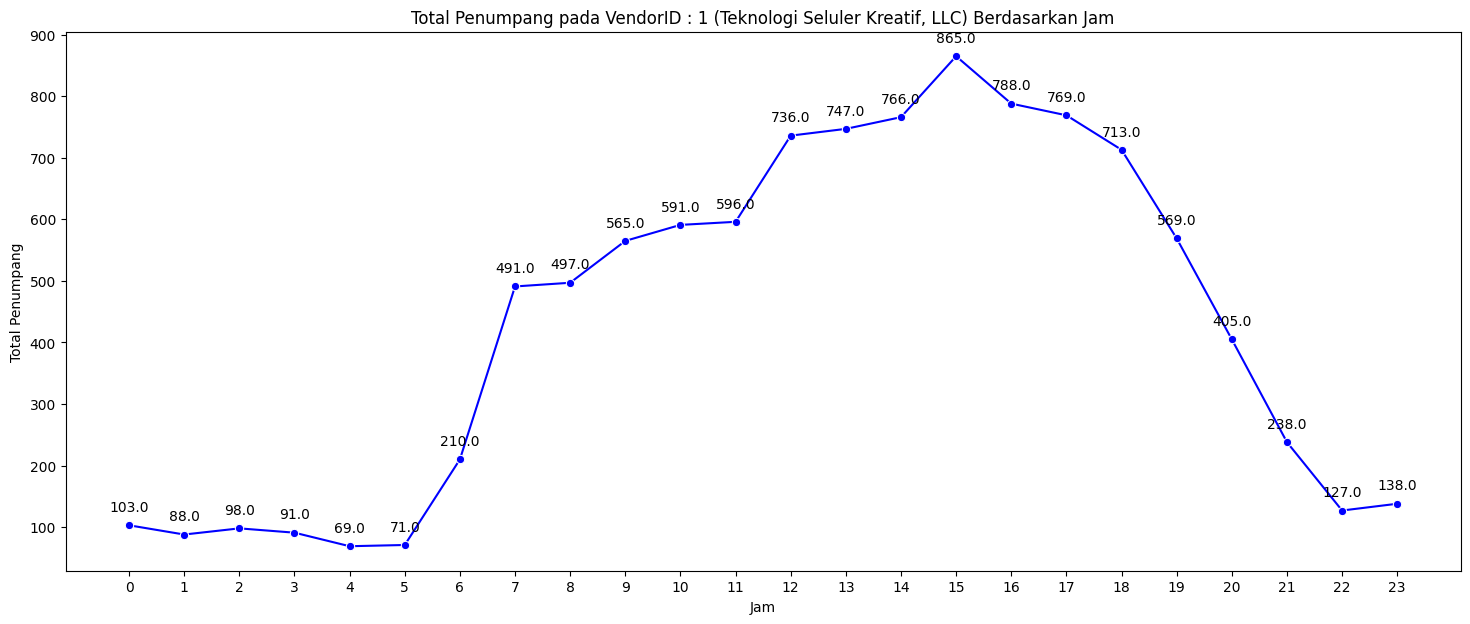

In [85]:
plt.figure(figsize=(18, 7))
ax = sns.lineplot(y='passenger_count', x='hour', data=passenger_count_VendorID_1_by_hour, color='blue', marker='o')
plt.title('Total Penumpang pada VendorID : 1 (Teknologi Seluler Kreatif, LLC) Berdasarkan Jam')

# menambahkan value
ax.set_xticks(passenger_count_VendorID_1_by_hour['hour'])
ax.set_xticklabels(passenger_count_VendorID_1_by_hour['hour'])

# menambahkan anotasi value
for x, y in zip(passenger_count_VendorID_1_by_hour['hour'], passenger_count_VendorID_1_by_hour['passenger_count']):
    ax.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# menambahkan label pada sumbu x, dan sumbu y
plt.xlabel('Jam')
plt.ylabel('Total Penumpang')

plt.show()

**Insight**

1. Analisis Data
    * Informasi diatas adalah yang tertera pada VendorId : 1 (Teknologi Seluler Kreatif, LLC)
    * Didapat hasil bahwa pukul 15.00 adalah jam dengan jumlah penumpang paling banyak, yaitu sebanyak 865 penumpang (Tertinggi di VendorID 1)
    * Sedangkan pukul 04.00 adalah jam dengan jumlah penumpang paling sedikit, yaitu hanya sebanyak 69 penumpang (Terendah di VendorID 1)

### -->3. Akan ditampilkan jumlah total bayar (total_amount) dari VendorID 1 yang akan digrup berdasarkan hari nya, untuk mengetahui hari paling profit pada VendorID 1 ada pada hari apa untuk Periode Bulan Januari 2023

In [86]:
# menampilkan total dari total_amount yang digrup berdasarkan hari
df_VendorID_1[["total_amount", "day"]].groupby("day").sum().sort_values("total_amount", ascending = False).reset_index()

,day,total_amount
0,Tuesday,34309.84
1,Thursday,30973.92
2,Monday,30791.77
3,Wednesday,28666.00
4,Friday,28035.91
5,Sunday,21977.37
6,Saturday,21285.62


In [87]:
# dibuat variabel supaya memudahkan dalam pemanggilannya
total_amount_VendorID_1_by_day = df_VendorID_1[["total_amount", "day"]].groupby("day").sum().sort_values("total_amount", ascending = False).reset_index()
total_amount_VendorID_1_by_day

,day,total_amount
0,Tuesday,34309.84
1,Thursday,30973.92
2,Monday,30791.77
3,Wednesday,28666.00
4,Friday,28035.91
5,Sunday,21977.37
6,Saturday,21285.62


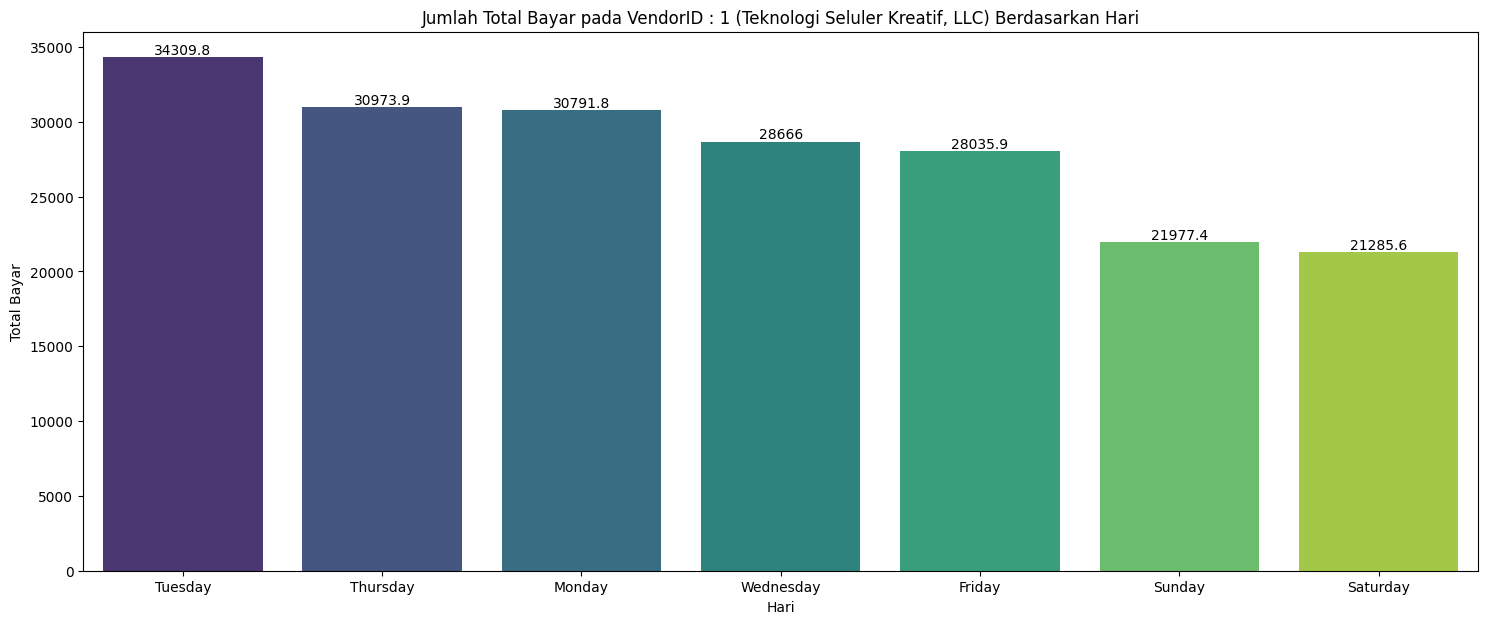

In [88]:
total_amount_VendorID_1_by_day = df_VendorID_1[["total_amount", "day"]].groupby("day").sum().sort_values("total_amount", ascending = False).reset_index()
total_amount_VendorID_1_by_day

plt.figure(figsize= (18, 7))
ax = sns.barplot(y= 'total_amount',x='day', data= total_amount_VendorID_1_by_day, palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.ylabel('Total Bayar')
plt.xlabel('Hari')

plt.title('Jumlah Total Bayar pada VendorID : 1 (Teknologi Seluler Kreatif, LLC) Berdasarkan Hari')

plt.show()

**Insight**

1. Analisis Data
    * Informasi diatas adalah yang tertera pada VendorId : 1 (Teknologi Seluler Kreatif, LLC)
    * Didapat hasil bahwa Tuesday adalah hari dengan total profit paling tinggi, yaitu sebanyak $34309.8 (Tertinggi di VendorID 1)
    * Sedangkan Saturday adalah hari dengan total profit paling rendah, yaitu hanya sebanyak $21285.6 (Terendah di VendorID 1)

### -->4. Akan ditampilkan jumlah total bayar (total_amount) dari VendorID 1 yang akan digrup berdasarkan jamnya, untuk mengetahui jam paling profit pada VendorID 1 ada pada pukul berapa untuk periode Bulan Januari 2023

In [89]:
# menampilkan total dari total_amount yang digrup berdasarkan jamnya
df_VendorID_1[["total_amount", "hour"]].groupby("hour").sum().sort_values("total_amount", ascending = False).map("{:.2f}".format).reset_index()

,hour,total_amount
0,15,16537.59
1,17,15263.58
2,16,15137.26
3,14,14785.94
4,13,14153.86
5,18,14020.11
6,12,13640.00
7,11,11903.36
8,10,11158.52
9,9,10662.68


In [90]:
# dibuat variabel supaya memudahkan dalam pemanggilannya
total_amount_VendorID_1_by_hour = df_VendorID_1[["total_amount", "hour"]].groupby("hour").sum().sort_values("total_amount", ascending = False).reset_index()
total_amount_VendorID_1_by_hour

,hour,total_amount
0,15,16537.59
1,17,15263.58
2,16,15137.26
3,14,14785.94
4,13,14153.86
5,18,14020.11
6,12,13640.00
7,11,11903.36
8,10,11158.52
9,9,10662.68


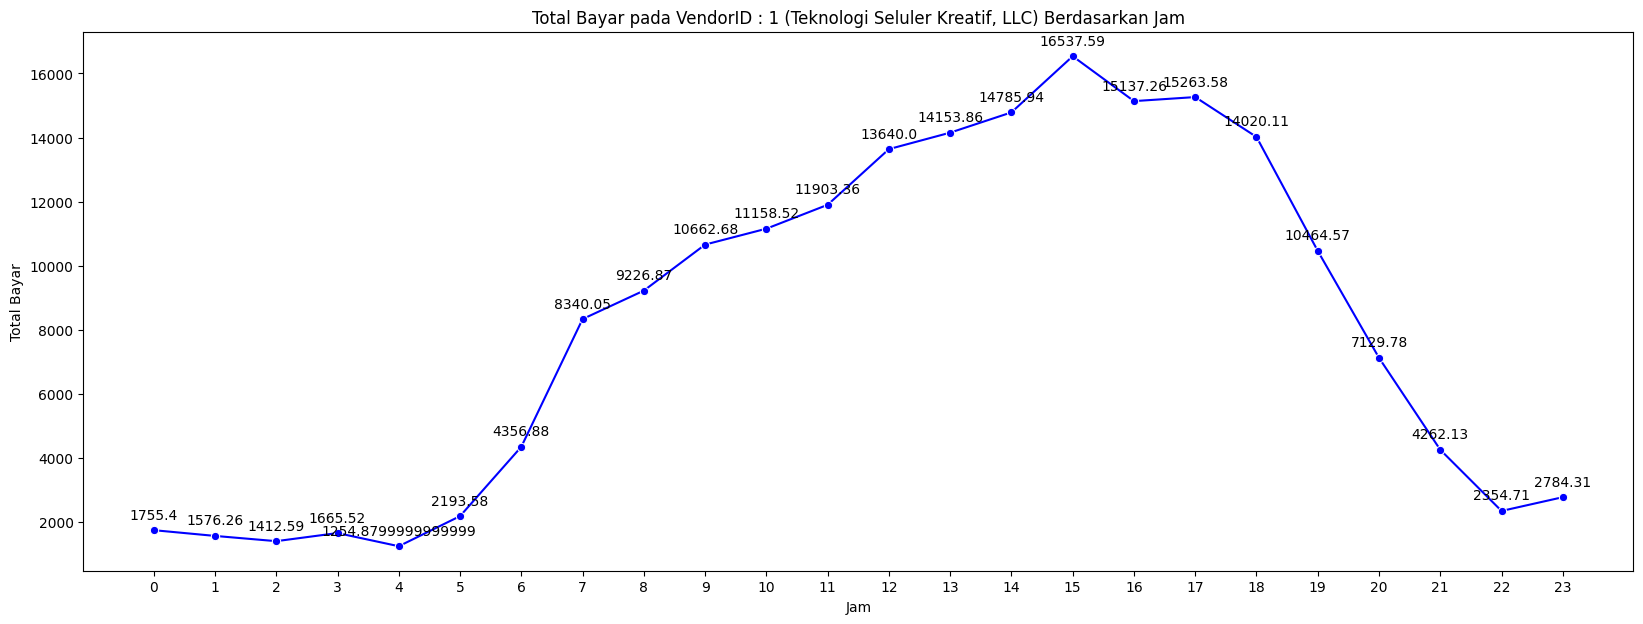

In [91]:
plt.figure(figsize=(20, 7))
ax = sns.lineplot(y='total_amount', x='hour', data=total_amount_VendorID_1_by_hour, color='blue', marker='o')

plt.title('Total Bayar pada VendorID : 1 (Teknologi Seluler Kreatif, LLC) Berdasarkan Jam')

ax.set_xticks(total_amount_VendorID_1_by_hour['hour'])
ax.set_xticklabels(total_amount_VendorID_1_by_hour['hour'])


for x, y in zip(total_amount_VendorID_1_by_hour['hour'], total_amount_VendorID_1_by_hour['total_amount']):
    ax.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,8), ha='center')

plt.xlabel('Jam')
plt.ylabel('Total Bayar')

plt.show()

**Insight**

1. Analisis Data
    * Informasi diatas adalah yang tertera pada VendorId : 1 (Teknologi Seluler Kreatif, LLC)
    * Didapat hasil bahwa pukul 15.00 adalah jam dengan jumlah total profit paling banyak, yaitu sebanyak $16537.59 (Tertinggi di VendorID 1)
    * Sedangkan pukul 04.00 adalah jam dengan jumlah total profit paling sedikit, yaitu hanya sebanyak $1254.88 (Terendah di VendorID 1)

### -->5. Akan ditampilkan total jarak tempuh (trip_distance) dari VendorID 1 yang akan digrup berdasarkan hari nya, untuk mengetahui hari paling profit pada VendorID 1 ada pada hari apa untuk periode Bulan Januari 2023

In [92]:
# menampilkan total dari trip_distance yang digrup berdasarkan hari
df_VendorID_1[["trip_distance", "day"]].groupby("day").sum().sort_values("trip_distance", ascending = False).reset_index()

,day,trip_distance
0,Tuesday,3398.6
1,Thursday,3252.0
2,Monday,3215.3
3,Wednesday,2921.3
4,Friday,2801.4
5,Sunday,2606.6
6,Saturday,2519.8


In [93]:
# dibuat variabel supaya memudahkan dalam pemanggilannya
trip_distance_VendorID_1_by_day = df_VendorID_1[["trip_distance", "day"]].groupby("day").sum().sort_values("trip_distance", ascending = False).reset_index()
trip_distance_VendorID_1_by_day

,day,trip_distance
0,Tuesday,3398.6
1,Thursday,3252.0
2,Monday,3215.3
3,Wednesday,2921.3
4,Friday,2801.4
5,Sunday,2606.6
6,Saturday,2519.8


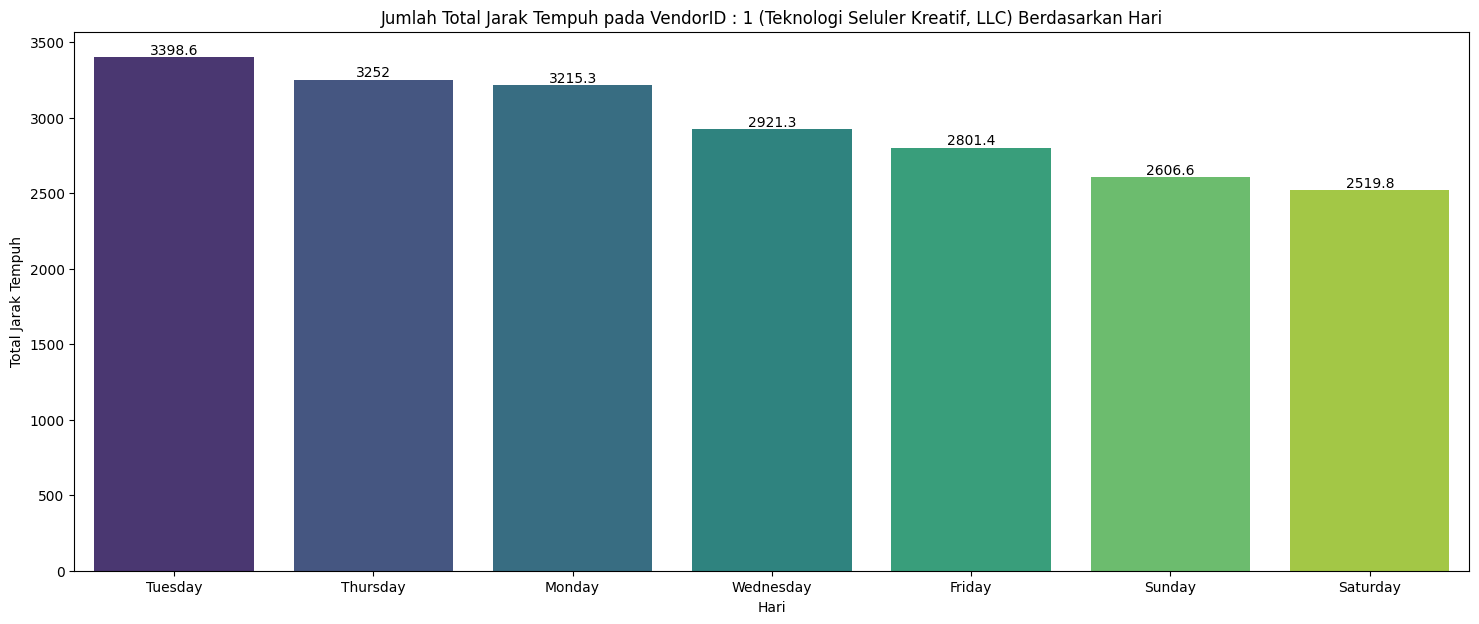

In [94]:
trip_distance_VendorID_1_by_day = df_VendorID_1[["trip_distance", "day"]].groupby("day").sum().sort_values("trip_distance", ascending = False).reset_index()
trip_distance_VendorID_1_by_day

plt.figure(figsize= (18, 7))

ax = sns.barplot(y= 'trip_distance',x='day', data= trip_distance_VendorID_1_by_day, palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)

plt.ylabel('Total Jarak Tempuh')
plt.xlabel('Hari')

plt.title('Jumlah Total Jarak Tempuh pada VendorID : 1 (Teknologi Seluler Kreatif, LLC) Berdasarkan Hari')

plt.show()

**Insight**

1. Analisis Data
    * Informasi diatas adalah yang tertera pada VendorId : 1 (Teknologi Seluler Kreatif, LLC)
    * Didapat hasil bahwa Tuesday adalah hari dengan total jarak tempuh paling tinggi, yaitu sebanyak 3398.6 mil (Tertinggi di VendorID 1)
    * Sedangkan Saturday adalah hari dengan total jarak tempuh paling rendah, yaitu hanya sebanyak 2519.8 mil (Terendah di VendorID 1)

### -->6. Akan ditampilkan total jarak tempuh (trip_distance) dari VendorID 1 yang akan digrup berdasarkan jam nya, untuk mengetahui jam paling profit pada VendorID 1 ada pada jam berapa untuk periode Bulan Januari 2023

In [95]:
# menampilkan total dari trip_distance yang digrup berdasarkan jam nya
df_VendorID_1[["trip_distance", "hour"]].groupby("hour").sum().sort_values("trip_distance", ascending = False).reset_index()

,hour,trip_distance
0,15,1787.5
1,14,1576.5
2,16,1555.3
3,18,1548.5
4,17,1509.0
5,13,1470.0
6,12,1310.7
7,11,1288.4
8,10,1101.3
9,19,1100.6


In [96]:
# dibuat variabel supaya memudahkan dalam pemanggilannya
trip_distance_VendorID_1_by_hour = df_VendorID_1[["trip_distance", "hour"]].groupby("hour").sum().sort_values("trip_distance", ascending = False).reset_index()
trip_distance_VendorID_1_by_hour

,hour,trip_distance
0,15,1787.5
1,14,1576.5
2,16,1555.3
3,18,1548.5
4,17,1509.0
5,13,1470.0
6,12,1310.7
7,11,1288.4
8,10,1101.3
9,19,1100.6


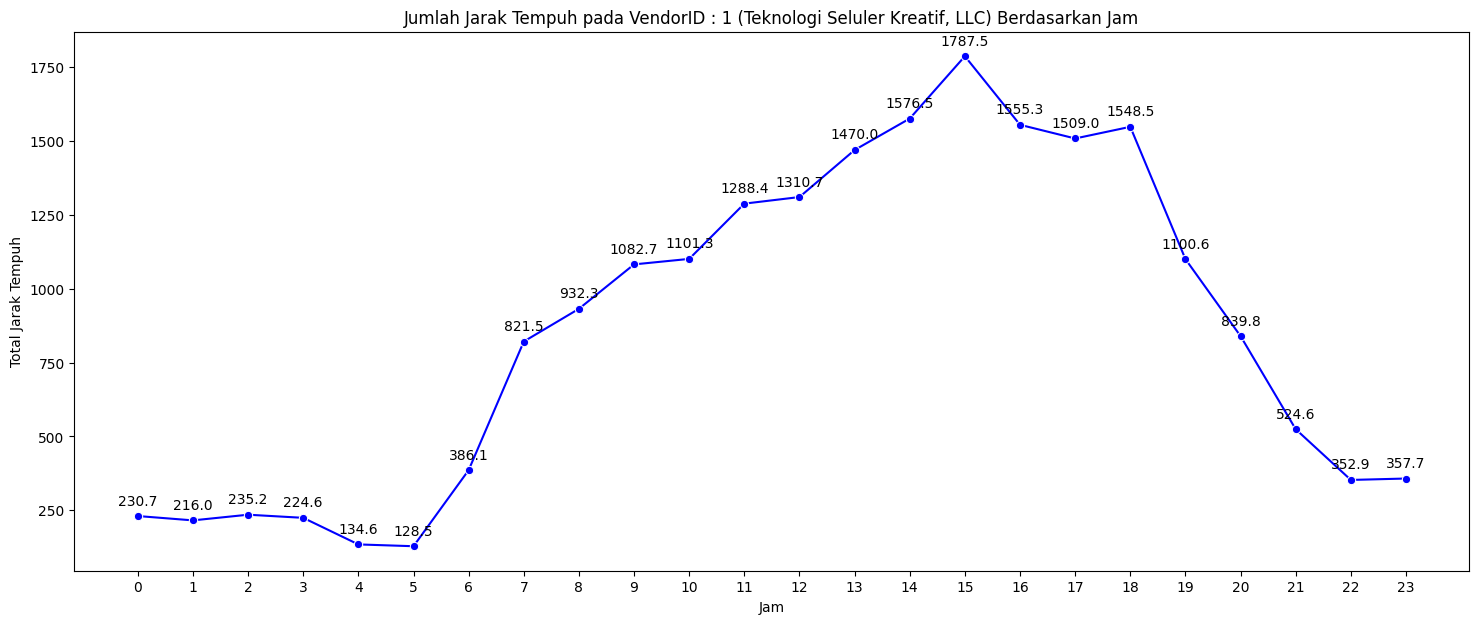

In [97]:
plt.figure(figsize=(18, 7))
ax = sns.lineplot(y='trip_distance', x='hour', data=trip_distance_VendorID_1_by_hour, color='blue', marker='o')
plt.title('Jumlah Jarak Tempuh pada VendorID : 1 (Teknologi Seluler Kreatif, LLC) Berdasarkan Jam')

ax.set_xticks(total_amount_VendorID_1_by_hour['hour'])
ax.set_xticklabels(total_amount_VendorID_1_by_hour['hour'])

for x, y in zip(trip_distance_VendorID_1_by_hour['hour'], trip_distance_VendorID_1_by_hour['trip_distance']):
    ax.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,8), ha='center')

plt.xlabel('Jam')
plt.ylabel('Total Jarak Tempuh')

plt.show()


**Insight**

1. Analisis Data
    * Informasi diatas adalah yang tertera pada VendorId : 1 (Teknologi Seluler Kreatif, LLC)
    * Didapat hasil bahwa pukul 15.00 adalah jam dengan jumlah total jarak tempuh paling banyak, yaitu sebanyak 1787.5 mil (Tertinggi di VendorID 1)
    * Sedangkan pukul 05.00 adalah jam dengan jumlah total jarak tempuh paling sedikit, yaitu hanya sebanyak 128.5 mil (Terendah di VendorID 1)

## Vendor : 2 (VeriFone Inc)

### -->1. Akan ditampilkan jumlah total penumpang (passenger_count) dari VendorID 2 yang akan digrup berdasarkan hari nya, untuk mengetahui hari paling profit pada VendorID 2 ada pada hari apa untuk periode Bulan Januari 2023

In [98]:
# menampilkan total dari passenger_count yang digrup berdasarkan hari
df_VendorID_2[["passenger_count", "day"]].groupby("day").sum().sort_values("passenger_count", ascending = False).reset_index()

,day,passenger_count
0,Tuesday,12733.0
1,Friday,11653.0
2,Thursday,11510.0
3,Monday,11130.0
4,Wednesday,11068.0
5,Sunday,9738.0
6,Saturday,9737.0


In [99]:
# dibuat variabel supaya memudahkan dalam pemanggilannya
passenger_count_VendorID_2_by_day = df_VendorID_2[["passenger_count", "day"]].groupby("day").sum().sort_values("passenger_count", ascending = False).reset_index()
passenger_count_VendorID_2_by_day

,day,passenger_count
0,Tuesday,12733.0
1,Friday,11653.0
2,Thursday,11510.0
3,Monday,11130.0
4,Wednesday,11068.0
5,Sunday,9738.0
6,Saturday,9737.0


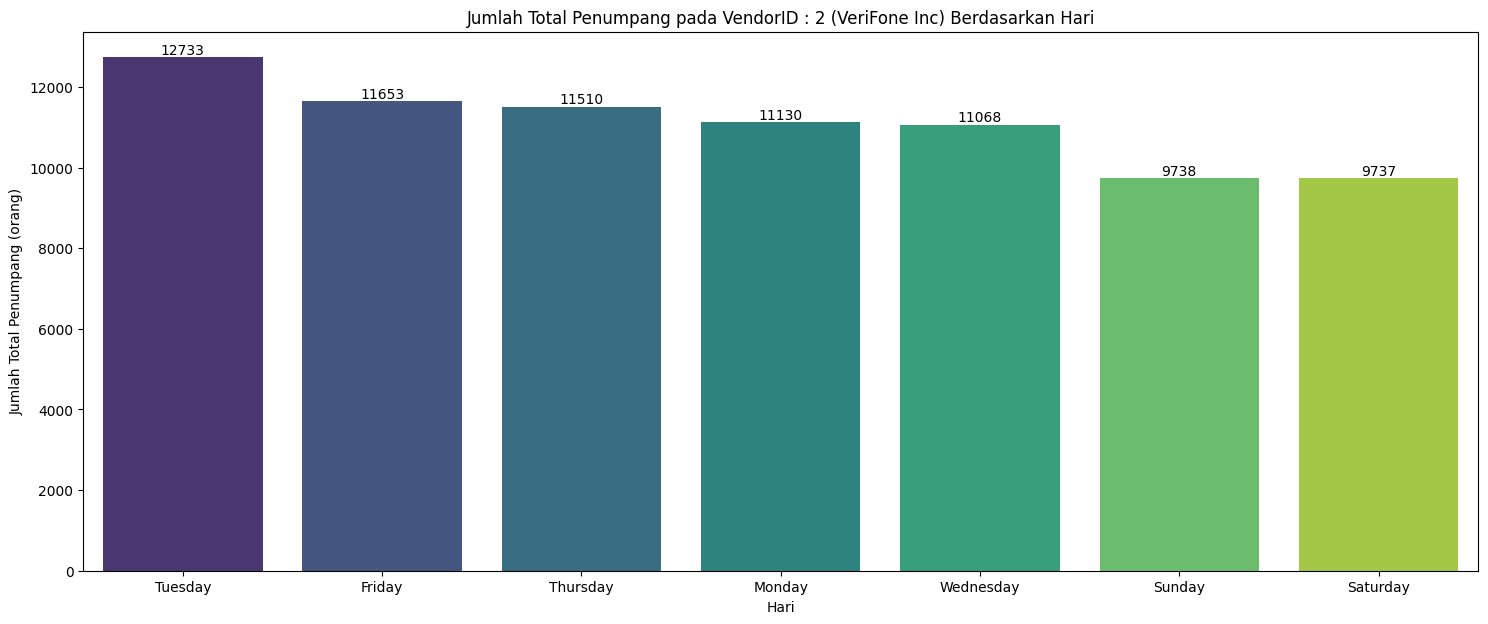

In [100]:
passenger_count_VendorID_2_by_day = df_VendorID_2[["passenger_count", "day"]].groupby("day").sum().sort_values("passenger_count", ascending = False).reset_index()
passenger_count_VendorID_2_by_day

plt.figure(figsize= (18, 7))
ax = sns.barplot(y= 'passenger_count',x='day', data= passenger_count_VendorID_2_by_day, palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('Jumlah Total Penumpang (orang)')
plt.xlabel('Hari')

plt.title('Jumlah Total Penumpang pada VendorID : 2 (VeriFone Inc) Berdasarkan Hari')

plt.show()

**Insight**

1. Analisis Data
    * Informasi diatas adalah yang tertera pada VendorId : 2 (VeriFone Inc)
    * Didapat hasil bahwa Tuesday adalah hari dengan jumlah total penumpang paling tinggi, yaitu sebanyak 12733 orang (Tertinggi di VendorID 2)
    * Sedangkan Saturday adalah hari dengan jumlah total penumpang paling rendah, yaitu hanya sebanyak 9737 orang (Terendah di VendorID 2)

### -->2. Akan ditampilkan jumlah total penumpang (passenger_count) dari VendorID 2 yang akan digrup berdasarkan jam nya, untuk mengetahui jam paling profit pada VendorID 2 ada pada hari apa untuk periode Bulan Januari 2023

In [101]:
# menampilkan total dari trip_distance yang digrup berdasarkan jam nya
df_VendorID_2[["passenger_count", "hour"]].groupby("hour").sum().sort_values("passenger_count", ascending = False).reset_index()

,hour,passenger_count
0,18,5993.0
1,17,5935.0
2,16,5837.0
3,15,5728.0
4,19,4851.0
5,14,4798.0
6,13,4330.0
7,10,4220.0
8,11,4220.0
9,12,3996.0


In [102]:
# dibuat variabel supaya memudahkan dalam pemanggilannya
passenger_count_VendorID_2_by_hour = df_VendorID_2[["passenger_count", "hour"]].groupby("hour").sum().sort_values("passenger_count", ascending = False).reset_index()
passenger_count_VendorID_2_by_hour

,hour,passenger_count
0,18,5993.0
1,17,5935.0
2,16,5837.0
3,15,5728.0
4,19,4851.0
5,14,4798.0
6,13,4330.0
7,10,4220.0
8,11,4220.0
9,12,3996.0


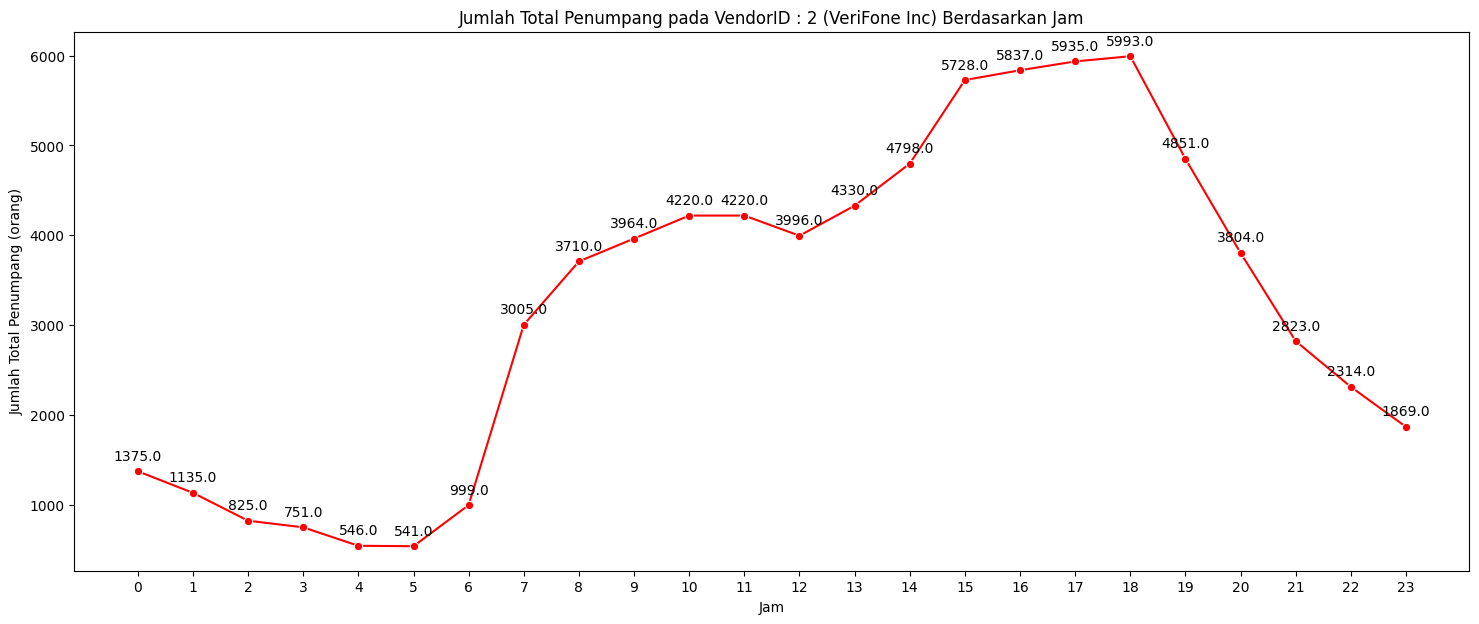

In [103]:
plt.figure(figsize=(18, 7))
ax = sns.lineplot(y='passenger_count', x='hour', data=passenger_count_VendorID_2_by_hour, color='red', marker='o')

plt.title('Jumlah Total Penumpang pada VendorID : 2 (VeriFone Inc) Berdasarkan Jam')

ax.set_xticks(passenger_count_VendorID_2_by_hour['hour'])
ax.set_xticklabels(passenger_count_VendorID_2_by_hour['hour'])

for x, y in zip(passenger_count_VendorID_2_by_hour['hour'], passenger_count_VendorID_2_by_hour['passenger_count']):
    ax.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,8), ha='center')

plt.xlabel('Jam')
plt.ylabel('Jumlah Total Penumpang (orang)')

plt.show()


**Insight**

1. Analisis Data
    * Informasi diatas adalah yang tertera pada VendorId : 2 (VeriFone Inc)
    * Didapat hasil bahwa pukul 18.00 adalah jam dengan jumlah total penumpang paling tinggi, yaitu sebanyak 5993 orang (Tertinggi di VendorID 2)
    * Sedangkan pukul 05.00 adalah jam dengan jumlah total penumpang paling rendah, yaitu hanya sebanyak 541 orang (Terendah di VendorID 2)

### -->3. Akan ditampilkan jumlah total bayar (total_amount) dari VendorID 2 yang akan digrup berdasarkan hari nya, untuk mengetahui hari paling profit pada VendorID 2 ada pada hari apa untuk periode Bulan Januari 2023

In [104]:
# menampilkan total dari total_amount yang digrup berdasarkan jam nya
df_VendorID_2[["total_amount", "day"]].groupby("day").sum().sort_values("total_amount", ascending = False).reset_index()

,day,total_amount
0,Tuesday,211285.63
1,Thursday,194934.96
2,Friday,190789.05
3,Monday,185375.03
4,Wednesday,185144.04
5,Saturday,163179.24
6,Sunday,159431.14


In [105]:
# menampilkan total dari total_amount yang digrup berdasarkan jam nya
total_amount_VendorId2_by_day = df_VendorID_2[["total_amount", "day"]].groupby("day").sum().sort_values("total_amount", ascending = False).reset_index()
total_amount_VendorId2_by_day

,day,total_amount
0,Tuesday,211285.63
1,Thursday,194934.96
2,Friday,190789.05
3,Monday,185375.03
4,Wednesday,185144.04
5,Saturday,163179.24
6,Sunday,159431.14


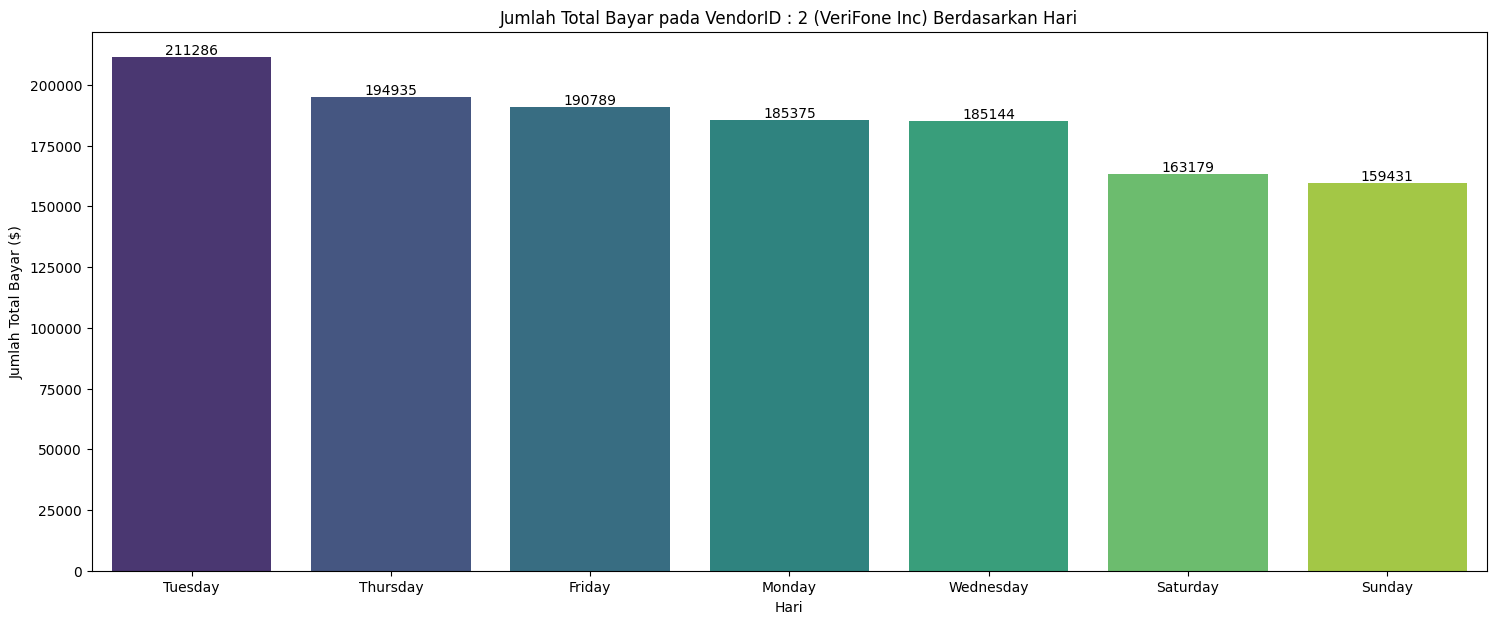

In [106]:
total_amount_VendorId2_by_day = df_VendorID_2[["total_amount", "day"]].groupby("day").sum().sort_values("total_amount", ascending = False).reset_index()
total_amount_VendorId2_by_day

plt.figure(figsize= (18, 7))
ax = sns.barplot(y= 'total_amount',x='day', data= total_amount_VendorId2_by_day, palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('Jumlah Total Bayar ($)')
plt.xlabel('Hari')
plt.title('Jumlah Total Bayar pada VendorID : 2 (VeriFone Inc) Berdasarkan Hari')

plt.show()

**Insight**

1. Analisis Data
    * Informasi diatas adalah yang tertera pada VendorId : 2 (VeriFone Inc)
    * Didapat hasil bahwa Tuesday adalah hari dengan jumlah total bayar paling tinggi, yaitu sebanyak $211285.63 (Tertinggi di VendorID 2)
    * Sedangkan Sunday adalah hari dengan jumlah total bayar paling rendah, yaitu hanya sebanyak $159431.14 (Terendah di VendorID 2)

### -->4. Akan ditampilkan jumlah total bayar (total_amount) dari VendorID 2 yang akan digrup berdasarkan jam nya, untuk mengetahui jam paling profit pada VendorID 2 ada pada pukul berapa untuk periode Bulan Januari 2023

In [107]:
# menampilkan total dari trip_distance yang digrup berdasarkan jam nya
df_VendorID_2[["total_amount", "hour"]].groupby("hour").sum().sort_values("total_amount", ascending = False).reset_index()

,hour,total_amount
0,17,102690.14
1,16,102312.66
2,18,100483.58
3,15,91763.42
4,14,82104.10
5,19,77633.42
6,13,72556.02
7,11,68670.11
8,12,67722.59
9,10,67589.77


In [108]:
# akan dibuat menjadi variabel agar memudahkan dalam memanggilnya
total_amount_VendorID2_by_hour = df_VendorID_2[["total_amount", "hour"]].groupby("hour").sum().sort_values("total_amount", ascending = False).reset_index()
total_amount_VendorID2_by_hour

,hour,total_amount
0,17,102690.14
1,16,102312.66
2,18,100483.58
3,15,91763.42
4,14,82104.10
5,19,77633.42
6,13,72556.02
7,11,68670.11
8,12,67722.59
9,10,67589.77


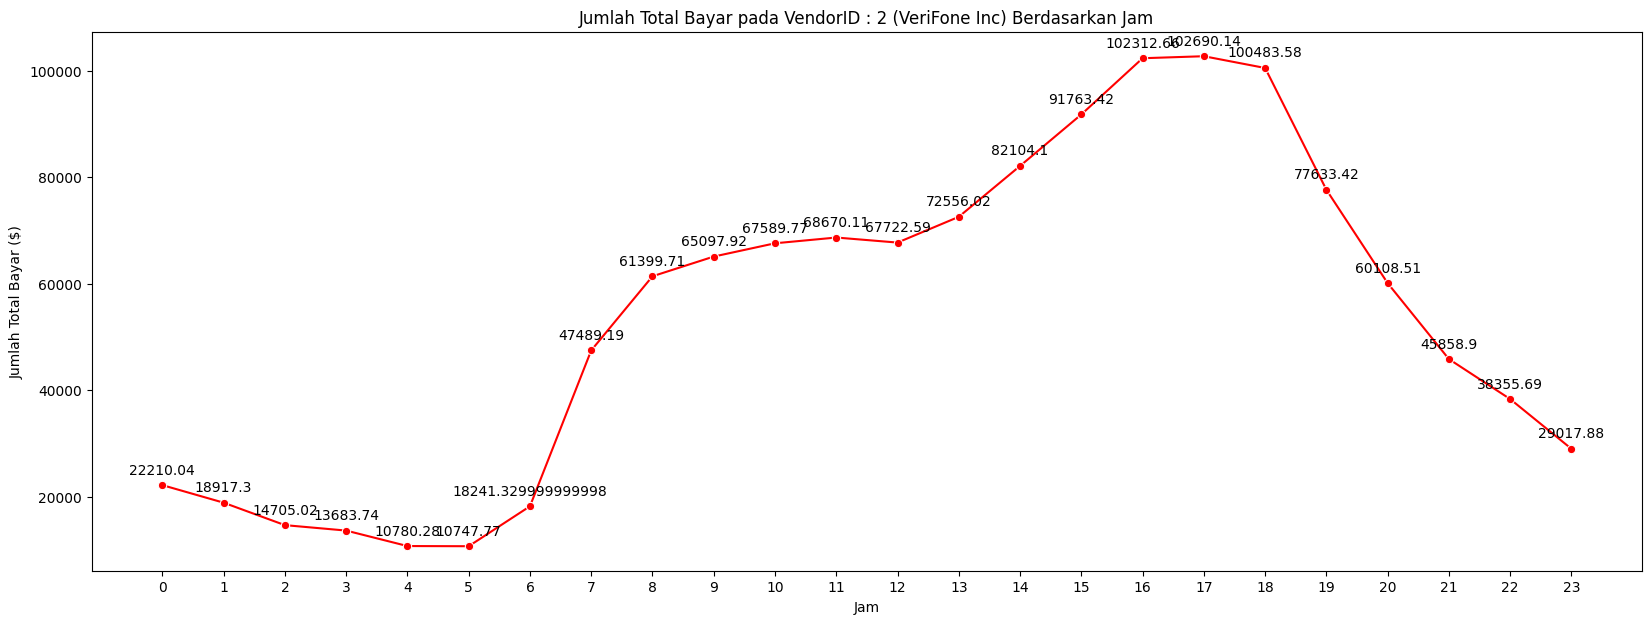

In [109]:
plt.figure(figsize=(20, 7))
ax = sns.lineplot(y='total_amount', x='hour', data=total_amount_VendorID2_by_hour, color='red', marker='o')

plt.title('Jumlah Total Bayar pada VendorID : 2 (VeriFone Inc) Berdasarkan Jam')

ax.set_xticks(total_amount_VendorID2_by_hour['hour'])
ax.set_xticklabels(total_amount_VendorID2_by_hour['hour'])

for x, y in zip(total_amount_VendorID2_by_hour['hour'], total_amount_VendorID2_by_hour['total_amount']):
    ax.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,8), ha='center')

plt.xlabel('Jam')
plt.ylabel('Jumlah Total Bayar ($)')

plt.show()


**Insight**

1. Analisis Data
    * Informasi diatas adalah yang tertera pada VendorId : 2 (VeriFone Inc)
    * Didapat hasil bahwa pukul 17.00 adalah jam dengan jumlah total bayar paling tinggi, yaitu sebanyak $102690.14 (Tertinggi di VendorID 2)
    * Sedangkan pukul 05.00 adalah jam dengan jumlah total bayar paling rendah, yaitu hanya sebanyak $10747.77 (Terendah di VendorID 2)

### -->5. Akan ditampilkan total jarak tempuh (trip_distance) dari VendorID 2 yang akan digrup berdasarkan hari nya, untuk mengetahui hari paling profit pada VendorID 2 ada pada hari apa untuk periode Bulan Januari 2023

In [110]:
# menampilkan total dari trip_distance yang digrup berdasarkan jam nya
df_VendorID_2[["trip_distance", "day"]].groupby("day").sum().sort_values("trip_distance", ascending = False).reset_index()

,day,trip_distance
0,Tuesday,25816.04
1,Friday,24001.73
2,Thursday,23739.89
3,Monday,23386.87
4,Wednesday,22166.96
5,Saturday,21342.72
6,Sunday,20927.92


In [111]:
# akan dibuat menjadi variabel, supaya mudah untuk memanggilnya
trip_distance_VendorID2_by_day = df_VendorID_2[["trip_distance", "day"]].groupby("day").sum().sort_values("trip_distance", ascending = False).reset_index()
trip_distance_VendorID2_by_day

,day,trip_distance
0,Tuesday,25816.04
1,Friday,24001.73
2,Thursday,23739.89
3,Monday,23386.87
4,Wednesday,22166.96
5,Saturday,21342.72
6,Sunday,20927.92


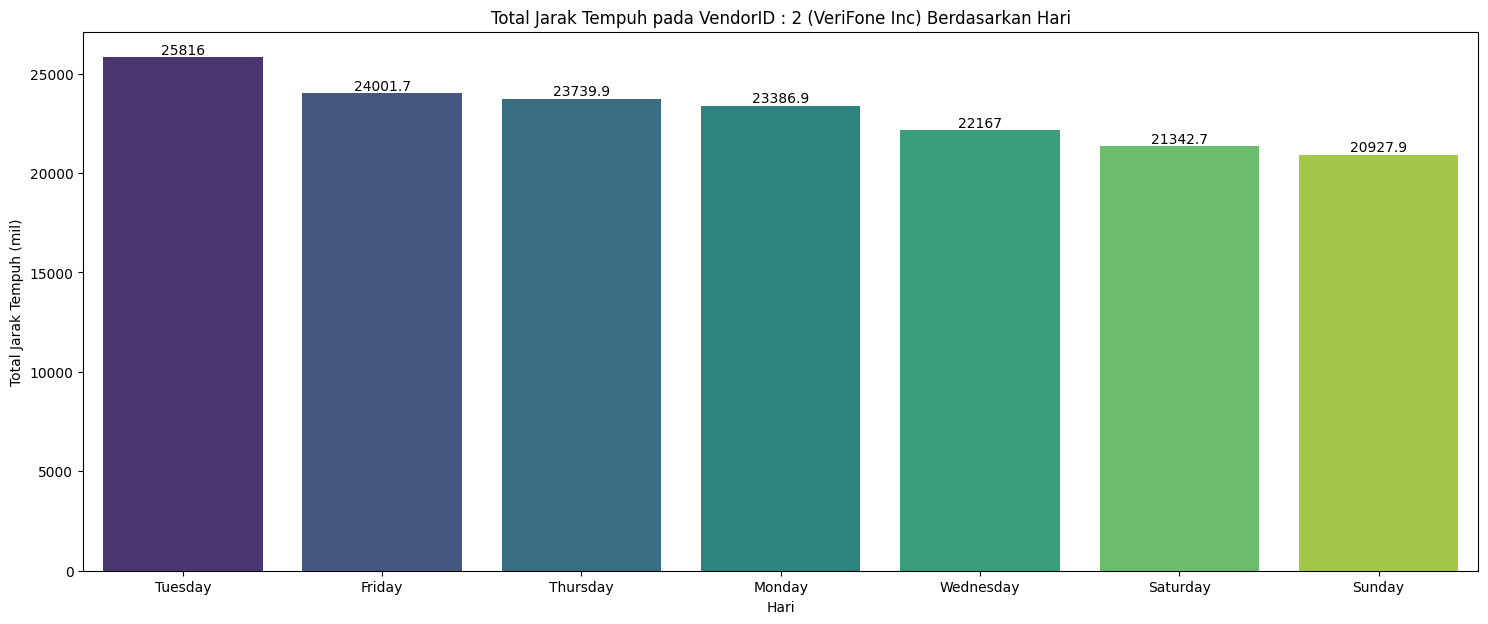

In [112]:
trip_distance_VendorID2_by_day = df_VendorID_2[["trip_distance", "day"]].groupby("day").sum().sort_values("trip_distance", ascending = False).reset_index()
trip_distance_VendorID2_by_day

plt.figure(figsize= (18, 7))
ax = sns.barplot(y= 'trip_distance',x='day', data= trip_distance_VendorID2_by_day, palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('Total Jarak Tempuh (mil)')
plt.xlabel('Hari')
plt.title('Total Jarak Tempuh pada VendorID : 2 (VeriFone Inc) Berdasarkan Hari')

plt.show()

**Insight**

1. Analisis Data
    * Informasi diatas adalah yang tertera pada VendorId : 2 (VeriFone Inc)
    * Didapat hasil bahwa Tuesday adalah hari dengan jumlah total jarak tempuh paling tinggi, yaitu sebanyak 25816.04 mil (Tertinggi di VendorID 2)
    * Sedangkan Sunday adalah hari dengan jumlah total jarak tempuh paling rendah, yaitu hanya sebanyak 20927.92 mil (Terendah di VendorID 2)

### -->6. Akan ditampilkan total jarak tempuh (trip_distance) dari VendorID 2 yang akan digrup berdasarkan jam nya, untuk mengetahui jam paling produktif pada VendorID 2 ada pada pukul berapa untuk periode Bulan Januari 2023

In [113]:
# menampilkan total dari trip_distance yang digrup berdasarkan jam nya
df_VendorID_2[["trip_distance", "hour"]].groupby("hour").sum().sort_values("trip_distance", ascending = False).reset_index()

,hour,trip_distance
0,17,11491.01
1,16,11461.32
2,18,11452.64
3,15,11217.66
4,14,10597.73
5,13,9506.19
6,11,8979.58
7,19,8928.39
8,10,8926.65
9,9,8871.21


In [114]:
# akan dibuat menjadi sebuah variabel, supaya mudah memanggilnya
trip_distance_VendorID2_by_hour = df_VendorID_2[["trip_distance", "hour"]].groupby("hour").sum().sort_values("trip_distance", ascending = False).reset_index()
trip_distance_VendorID2_by_hour

,hour,trip_distance
0,17,11491.01
1,16,11461.32
2,18,11452.64
3,15,11217.66
4,14,10597.73
5,13,9506.19
6,11,8979.58
7,19,8928.39
8,10,8926.65
9,9,8871.21


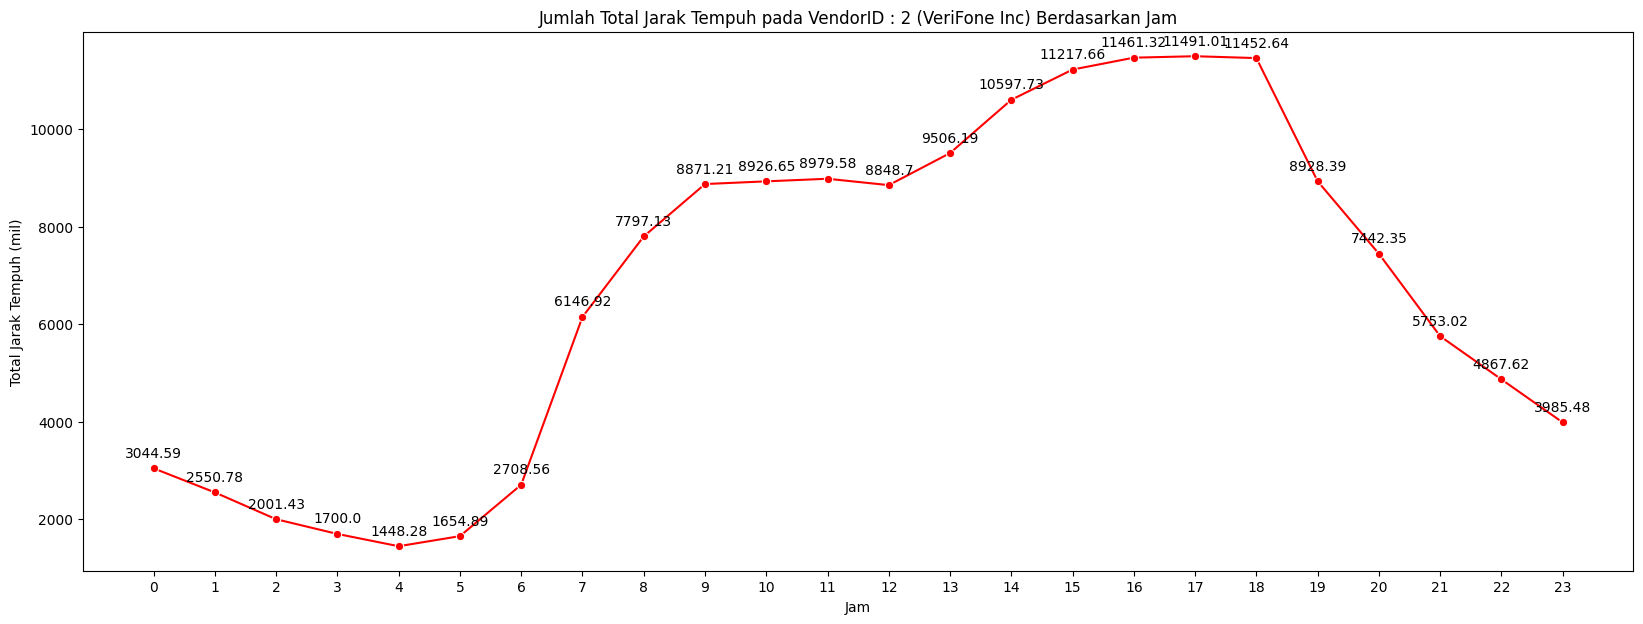

In [115]:
plt.figure(figsize=(20, 7))
ax = sns.lineplot(y='trip_distance', x='hour', data=trip_distance_VendorID2_by_hour, color='red', marker='o')

plt.title('Jumlah Total Jarak Tempuh pada VendorID : 2 (VeriFone Inc) Berdasarkan Jam')

ax.set_xticks(trip_distance_VendorID2_by_hour['hour'])
ax.set_xticklabels(trip_distance_VendorID2_by_hour['hour'])

for x, y in zip(trip_distance_VendorID2_by_hour['hour'], trip_distance_VendorID2_by_hour['trip_distance']):
    ax.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,8), ha='center')

plt.xlabel('Jam')
plt.ylabel('Total Jarak Tempuh (mil)')

plt.show()


**Insight**

1. Analisis Data
    * Informasi diatas adalah yang tertera pada VendorId : 2 (VeriFone Inc)
    * Didapat hasil bahwa pukul 17.00 adalah jam dengan jumlah total jarak tempuk paling tinggi, yaitu sebanyak 11491.01 mil (Tertinggi di VendorID 2)
    * Sedangkan pukul 04.00 adalah jam dengan jumlah total jarak tempuk paling rendah, yaitu hanya sebanyak 1448.28 mil (Terendah di VendorID 2)

Selanjutnya akan dibandingkan antara VendorID : 1 (Teknologi Seluler Kreatif, LLC) dengan VendorID : 2 (VeriFone Inc) untuk melihat performa dari masing - masing vendor. Ini akan berguna untuk melihat kelemahan dari masing - masing vendor, yang nantinya bisa diambil untuk pengambilan kebijakan.

### **Perbandingan Jumlah Total Penumpang (passenger_count) Antara VendorID 1 dengan VendorID 2 (Total) berdasarkan Jam**

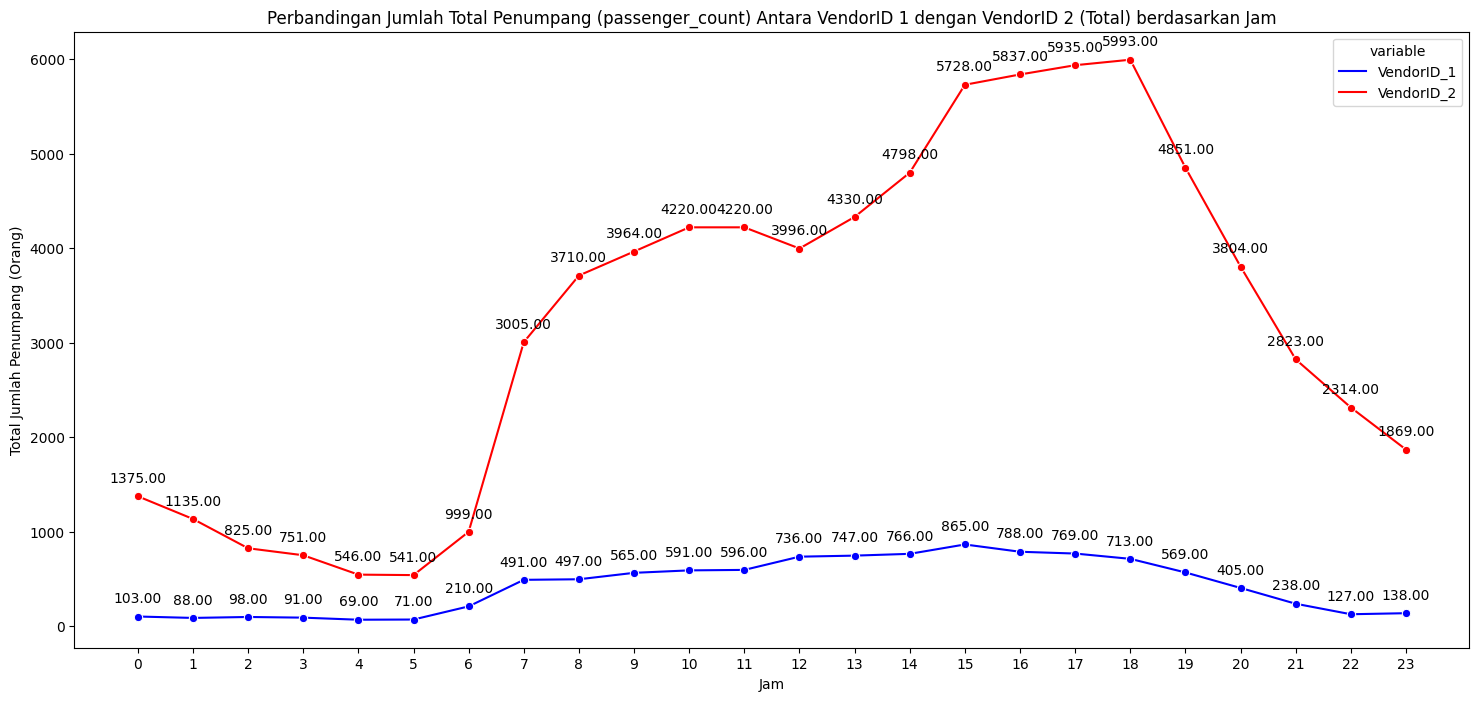

In [116]:
passenger_count_VendorID_1 = df_VendorID_1.groupby('hour')['passenger_count'].sum().reset_index()
passenger_count_VendorID_1.rename(columns={'passenger_count': 'VendorID_1'}, inplace=True)

passenger_count_VendorID_2 = df_VendorID_2.groupby('hour')['passenger_count'].sum().reset_index()
passenger_count_VendorID_2.rename(columns={'passenger_count': 'VendorID_2'}, inplace=True)

comparison_df = pd.merge(passenger_count_VendorID_1, passenger_count_VendorID_2, on='hour')

plt.figure(figsize=(18, 8))
ax = sns.lineplot(x='hour', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['hour'], value_vars=['VendorID_1', 'VendorID_2']), palette={'VendorID_1': 'blue', 'VendorID_2': 'red'}, marker='o')

for _, row in comparison_df.iterrows():
    plt.annotate(f"{row['VendorID_1']:.2f}", (row['hour'], row['VendorID_1']), xytext=(0, 10), textcoords='offset points', ha='center')
    plt.annotate(f"{row['VendorID_2']:.2f}", (row['hour'], row['VendorID_2']), xytext=(0, 10), textcoords='offset points', ha='center')
plt.title('Perbandingan Jumlah Total Penumpang (passenger_count) Antara VendorID 1 dengan VendorID 2 (Total) berdasarkan Jam')

ax.set_xticks(comparison_df['hour'])
ax.set_xticklabels(comparison_df['hour'])

plt.xlabel('Jam')
plt.ylabel('Total Jumlah Penumpang (Orang)')
plt.show()

**Insight**

* Pada lineplot diatas diperlihatkan perbandingan antara Total Jumlah Penumpang (passenger_count) untuk VendorID : 1 dan VendorID : 2, ditampilkan dengan total penumpang yang di jumlahkan (.sum) kan untuk setiap jamnya untuk periode Bulan Januari 2023.
* VendorID : 1 ditandai dengan garis yang berwarna biru, dan VendorID : 2 ditandai dengan garis yang berwarna merah.
* Pada VendorID : 1, total penumpang tertinggi yaitu pada pukul 15.00 yaitu sebanyak 865 orang, sedangkan paling rendah pada pukul 04.00 yaitu sebanyak 69 orang.
* Pada VendorID : 2, total penumpang tertinggi yaitu pada pukul 18.00 yaitu sebanyak 5993 orang, sedangkan paling rendah pada pukul 05.00 yaitu sebanyak 541 orang.

### **Perbandingan Jumlah Total Penumpang (passenger_count) Antara VendorID 1 dengan VendorID 2 (Total) berdasarkan Hari**

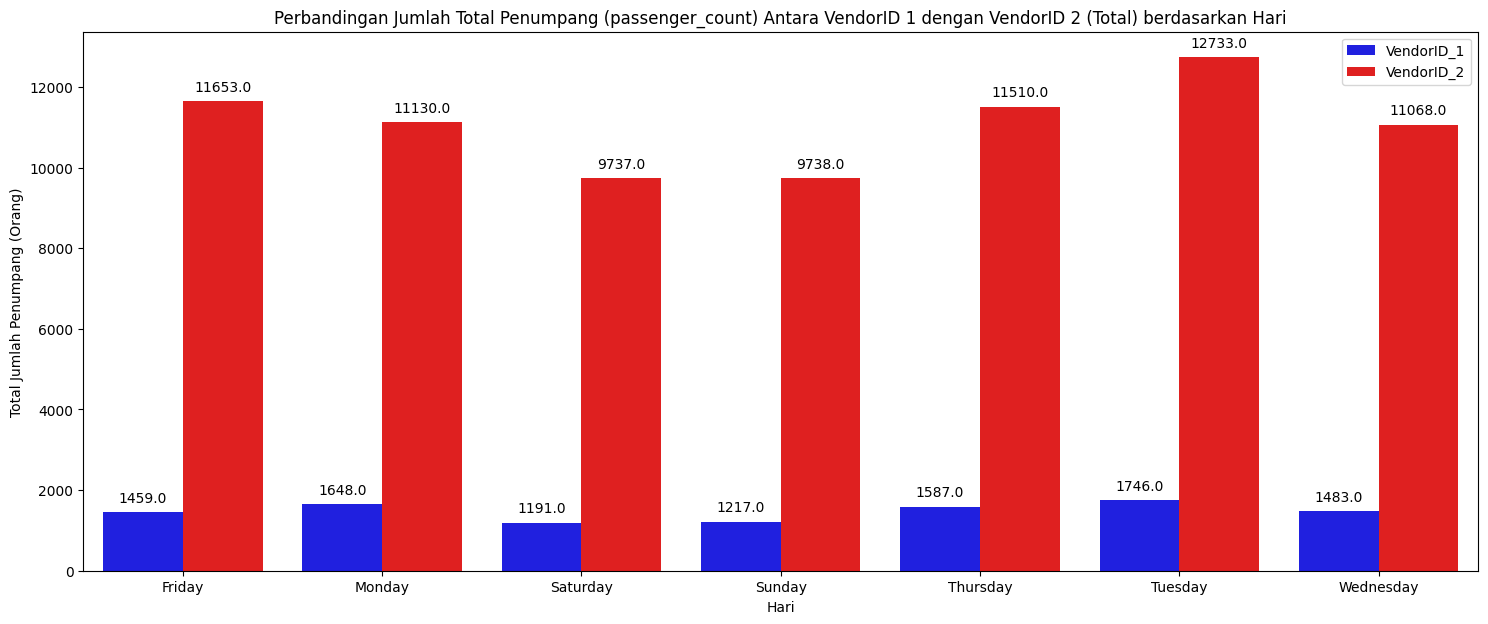

In [117]:

passenger_count_VendorID_1 = df_VendorID_1.groupby('day')['passenger_count'].sum().reset_index()
passenger_count_VendorID_1.rename(columns={'passenger_count': 'VendorID_1'}, inplace=True)

passenger_count_VendorID_2 = df_VendorID_2.groupby('day')['passenger_count'].sum().reset_index()
passenger_count_VendorID_2.rename(columns={'passenger_count': 'VendorID_2'}, inplace=True)

comparison_df = pd.merge(passenger_count_VendorID_1, passenger_count_VendorID_2, on='day')

my_palette = sns.color_palette(['blue', 'red'])

plt.figure(figsize=(18, 7))

ax = sns.barplot(x='day', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['day'], value_vars=['VendorID_1', 'VendorID_2']), palette=my_palette)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Perbandingan Jumlah Total Penumpang (passenger_count) Antara VendorID 1 dengan VendorID 2 (Total) berdasarkan Hari')

plt.xlabel('Hari')
plt.ylabel('Total Jumlah Penumpang (Orang)')
plt.legend()
plt.show()

**Insight**

* Pada barplot diatas diperlihatkan perbandingan antara Total Jumlah Penumpang (passenger_count) untuk VendorID : 1 dan VendorID : 2, ditampilkan dengan total penumpang yang di jumlahkan (.sum) kan untuk setiap harinya untuk periode Bulan Januari 2023.
* VendorID : 1 ditandai dengan garis yang berwarna biru, dan VendorID : 2 ditandai dengan garis yang berwarna merah.
* Pada VendorID : 1, total penumpang tertinggi yaitu pada Hari Tuesday yaitu sebanyak 1746 orang, sedangkan paling rendah pada Hari Saturday yaitu sebanyak 1191 orang.
* Pada VendorID : 2, total penumpang tertinggi yaitu pada Hari Tuesday yaitu sebanyak 12733 orang, sedangkan paling rendah pada Hari Saturday yaitu sebanyak 9737 orang.

## **Perbandingan Jumlah Total Bayar (total_amount) Antara VendorID 1 dengan VendorID 2 (Total) berdasarkan Hari**

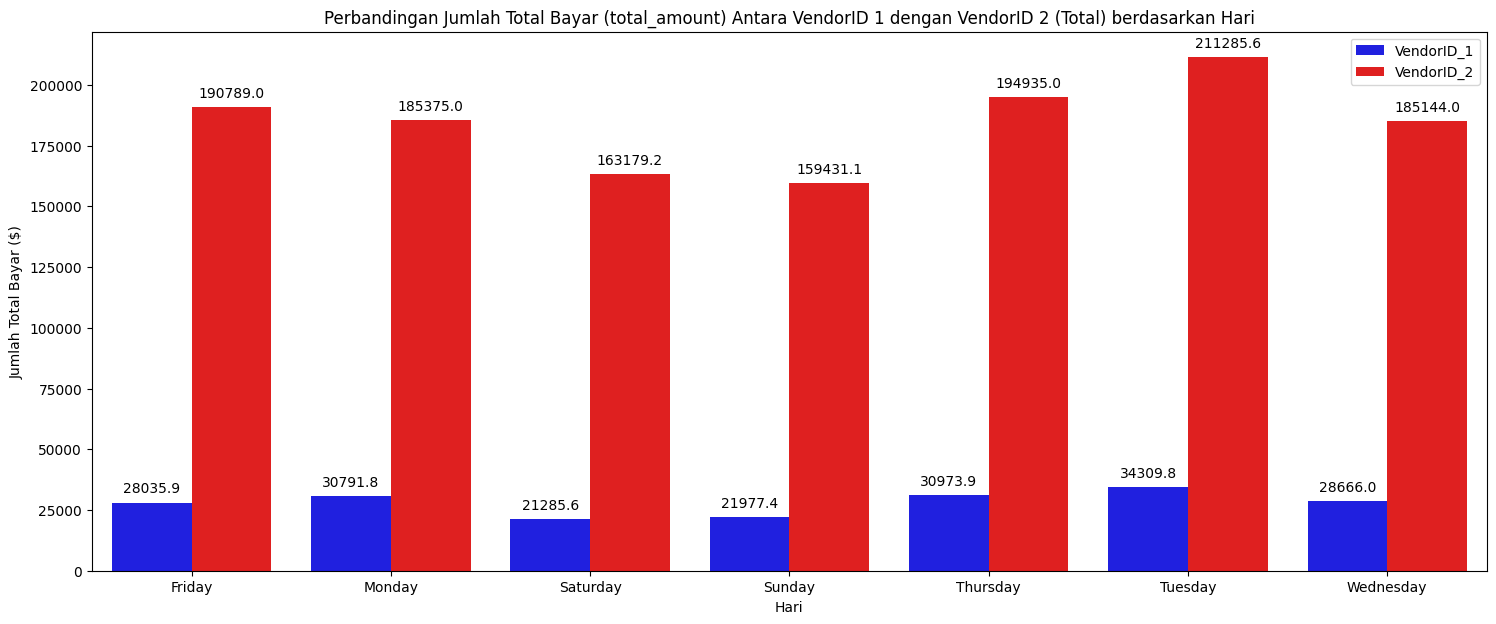

In [118]:
total_amount_VendorID_1 = df_VendorID_1.groupby('day')['total_amount'].sum().reset_index()
total_amount_VendorID_1.rename(columns={'total_amount': 'VendorID_1'}, inplace=True)

total_amount_VendorID_2 = df_VendorID_2.groupby('day')['total_amount'].sum().reset_index()
total_amount_VendorID_2.rename(columns={'total_amount': 'VendorID_2'}, inplace=True)

comparison_df = pd.merge(total_amount_VendorID_1, total_amount_VendorID_2, on='day')

my_palette = sns.color_palette(['blue', 'red'])

plt.figure(figsize=(18, 7))

ax = sns.barplot(x='day', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['day'], value_vars=['VendorID_1', 'VendorID_2']), palette=my_palette)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Perbandingan Jumlah Total Bayar (total_amount) Antara VendorID 1 dengan VendorID 2 (Total) berdasarkan Hari')

plt.xlabel('Hari')
plt.ylabel('Jumlah Total Bayar ($)')
plt.legend()
plt.show()

**Insight**

* Pada barplot diatas diperlihatkan perbandingan antara Total Jumlah Bayar (total_amount) untuk VendorID : 1 dan VendorID : 2, ditampilkan dengan total penumpang yang di jumlahkan (.sum) kan untuk setiap harinya untuk periode Bulan Januari 2023.
* VendorID : 1 ditandai dengan garis yang berwarna biru, dan VendorID : 2 ditandai dengan garis yang berwarna merah.
* Pada VendorID : 1, total bayar tertinggi yaitu pada Hari Tuesday yaitu sebanyak $34309.8, sedangkan paling rendah pada Hari Saturday yaitu sebanyak $212285.6.
* Pada VendorID : 2, total bayar tertinggi yaitu pada Hari Tuesday yaitu sebanyak $211285.6, sedangkan paling rendah pada Hari Saturday yaitu sebanyak $159431.1.

## **Kesimpulan**

Secara garis besar :

    * VendorID : 1 (Teknologi Seluler Kreatif, LLC) memiliki presentase sebanyak 13.7% atau sebanyak 9302 data, dan VendorID : 2 (VeriFone Inc) memiliki presentase jauh lebih banyak yaitu 86.3% atau sebanyak 58602 data. Yang jika dijumlahkan akan menjadi 67904 (total data keseluruhan)
    * Pada masing - masing VendorID terdapat 22 kolom

### Vendor : 1 (Teknologi Seluler Kreatif, LLC)
Analisis Data Untuk VendorID : 1 (Teknologi Seluler Kreatif, LLC)

    * Informasi diatas adalah yang tertera pada VendorId : 1 (Teknologi Seluler Kreatif, LLC)
    * Didapat hasil bahwa Tuesday adalah hari dengan jumlah penumpang paling banyak, yaitu sebanyak 1750 penumpang (Tertinggi di VendorID 1)
    * Sedangkan Saturday adalah hari dengan jumlah penumpang paling sedikit, yaitu sebanyak 1195 penumpang (Terendah di VendorID 1)
    * Didapat hasil bahwa pukul 15.00 adalah jam dengan jumlah penumpang paling banyak, yaitu sebanyak 865 penumpang (Tertinggi di VendorID 1)
    * Sedangkan pukul 04.00 adalah jam dengan jumlah penumpang paling sedikit, yaitu hanya sebanyak 69 penumpang (Terendah di VendorID 1)
    * Didapat hasil bahwa Tuesday adalah hari dengan total profit paling tinggi, yaitu sebanyak $34309.8 (Tertinggi di VendorID 1)
    * Sedangkan Saturday adalah hari dengan total profit paling rendah, yaitu hanya sebanyak $21285.6 (Terendah di VendorID 1)
    * Didapat hasil bahwa pukul 15.00 adalah jam dengan jumlah total profit paling banyak, yaitu sebanyak $16537.59 (Tertinggi di VendorID 1)
    * Sedangkan pukul 04.00 adalah jam dengan jumlah total profit paling sedikit, yaitu hanya sebanyak $1254.88 (Terendah di VendorID 1)
    * Didapat hasil bahwa Tuesday adalah hari dengan total jarak tempuh paling tinggi, yaitu sebanyak 3398.6 mil (Tertinggi di VendorID 1)
    * Sedangkan Saturday adalah hari dengan total jarak tempuh paling rendah, yaitu hanya sebanyak 2519.8 mil (Terendah di VendorID 1)
    * Didapat hasil bahwa pukul 15.00 adalah jam dengan jumlah total jarak tempuh paling banyak, yaitu sebanyak 1787.5 mil (Tertinggi di VendorID 1)
    * Sedangkan pukul 05.00 adalah jam dengan jumlah total jarak tempuh paling sedikit, yaitu hanya sebanyak 128.5 mil (Terendah di VendorID 1)

### Vendor : 2 (VeriFone Inc)

**Insight**

Analisis Data Untuk VendorID : 2 (VeriFone Inc)

    * Informasi diatas adalah yang tertera pada VendorId : 2 (VeriFone Inc)
    * Didapat hasil bahwa Tuesday adalah hari dengan jumlah total penumpang paling tinggi, yaitu sebanyak 12733 orang (Tertinggi di VendorID 2)
    * Sedangkan Saturday adalah hari dengan jumlah total penumpang paling rendah, yaitu hanya sebanyak 9737 orang (Terendah di VendorID 2)
    * Didapat hasil bahwa pukul 18.00 adalah jam dengan jumlah total penumpang paling tinggi, yaitu sebanyak 5993 orang (Tertinggi di VendorID 2)
    * Sedangkan pukul 05.00 adalah jam dengan jumlah total penumpang paling rendah, yaitu hanya sebanyak 541 orang (Terendah di VendorID 2)
    * Didapat hasil bahwa Tuesday adalah hari dengan jumlah total bayar paling tinggi, yaitu sebanyak $211285.63 (Tertinggi di VendorID 2)
    * Sedangkan Sunday adalah hari dengan jumlah total bayar paling rendah, yaitu hanya sebanyak $159431.14 (Terendah di VendorID 2)
    * Didapat hasil bahwa pukul 17.00 adalah jam dengan jumlah total bayar paling tinggi, yaitu sebanyak $102690.14 (Tertinggi di VendorID 2)
    * Sedangkan pukul 05.00 adalah jam dengan jumlah total bayar paling rendah, yaitu hanya sebanyak $10747.77 (Terendah di VendorID 2)
    * Didapat hasil bahwa Tuesday adalah hari dengan jumlah total jarak tempuh paling tinggi, yaitu sebanyak 25816.04 mil (Tertinggi di VendorID 2)
    * Sedangkan Sunday adalah hari dengan jumlah total jarak tempuh paling rendah, yaitu hanya sebanyak 20927.92 mil (Terendah di VendorID 2)
    * Didapat hasil bahwa pukul 17.00 adalah jam dengan jumlah total jarak tempuk paling tinggi, yaitu sebanyak 11491.01 mil (Tertinggi di VendorID 2)
    * Sedangkan pukul 04.00 adalah jam dengan jumlah total jarak tempuk paling rendah, yaitu hanya sebanyak 1448.28 mil (Terendah di VendorID 2)

## **Rekomendasi**

### **Rekomendasi**

    * Sebaiknya baik pada VendorID : 1 ataupun VendorID : 2, keduanya memperhatikan hari dan jam dimana permintaan penumpang sedang tinggi. Agar dilakukan tindakan untuk menambah armada cadangan untuk antisipasi jika terjadi kekurangan armada.
    * VendorID : 1 meningkatkan kualitas pelayanan, armada, promosi agar performa nya bisa meningkat secara signifikan demi bisa bersaing dengan kompetitor.
    * VendorID : 2 terus menjadi kualitas, performa dan jika bisa meningkatkannya